# Exploratory Data Analysis (EDA) of Airbnb London Data

Let's analyze the airbnb database about the city of London. To do this, we will answer the following questions:

1 - Which types of rooms are the most rented? And the highest revenue?

2 - How reviews vary with respect to the type of type of room

3 - Which neighborhood are the most rented? And the highest revenue?

4 - How reviews vary with respect to the type of neighbourhood?

5 - Which types of rooms and neighborhoods have the most availability?¶

6 - Which type of rooms have the best revenue x availability? And the neighborhoods?

7 - Which neighborhood has the most reviews?

8 - How is the distribuition of type of room per neighborhood?

9 - How prices vary with reviews?

10 - How is the distribuition of prices per London?

In [1]:
# Importing Libraries

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Reading Files and Creating Data Frame

listing = pd.read_csv("listings.csv")

C:\Users\arsnf\AppData\Local\Temp\ipykernel_17480\1542154260.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  listing = pd.read_csv("listings.csv")


In [3]:
#Checking Data Frame - listing

listing.head(5)

id                                               name  host_id  \
0  13913  Rental unit in Islington · ★4.80 · 1 bedroom ·...    54730   
1  15400  Rental unit in London · ★4.80 · 1 bedroom · 1 ...    60302   
2  92644  Rental unit in Earlsfield · ★4.57 · 1 bedroom ...   498201   
3  17402  Rental unit in London · ★4.76 · 3 bedrooms · 3...    67564   
4  93015  Rental unit in Hammersmith · ★4.82 · 2 bedroom...   499704   

  host_name  neighbourhood_group           neighbourhood  latitude  longitude  \
0     Alina                  NaN               Islington  51.56861   -0.11270   
1  Philippa                  NaN  Kensington and Chelsea  51.48780   -0.16813   
2   Dee Dee                  NaN              Wandsworth  51.44201   -0.18739   
3       Liz                  NaN             Westminster  51.52195   -0.14094   
4     Sarah                  NaN  Hammersmith and Fulham  51.49993   -0.21707   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     79               1                 41  2022-12-11   
1  Entire home/apt    150               7                 94  2023-05-01   
2     Private room     42               2                216  2022-10-29   
3  Entire home/apt    476               3                 54  2022-11-19   
4  Entire home/apt    175               5                 38  2022-09-30   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.26                               2               360   
1               0.56                               1                73   
2               1.45                               1               217   
3               0.36                               9               300   
4               0.27                               1                40   

   number_of_reviews_ltm license  
0                     11     NaN  
1                      5     NaN  
2                      9     NaN  
3                      4     NaN  
4                      2     NaN

In [4]:
#Checking DataFrame size

listing.shape

(87947, 18)

In [5]:
#Checking general info about dataframe

listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87947 entries, 0 to 87946
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              87947 non-null  int64  
 1   name                            87947 non-null  object 
 2   host_id                         87947 non-null  int64  
 3   host_name                       87941 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   87947 non-null  object 
 6   latitude                        87947 non-null  float64
 7   longitude                       87947 non-null  float64
 8   room_type                       87947 non-null  object 
 9   price                           87947 non-null  int64  
 10  minimum_nights                  87947 non-null  int64  
 11  number_of_reviews               87947 non-null  int64  
 12  last_review                     

In [6]:
#Checking duplicates rows and drop.
listing_dup = listing.copy()
listing = listing.drop_duplicates(subset=None, keep="first")

In [7]:
#Checking null values based on columns

listing.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             6
neighbourhood_group               87947
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       22158
reviews_per_month                 22158
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           87946
dtype: int64

In [8]:
#Checking basic descriptive statistics for numerical columns.

listing.describe()

id       host_id  neighbourhood_group      latitude  \
count  8.794700e+04  8.794700e+04                  0.0  87947.000000   
mean   3.586483e+17  1.589889e+08                  NaN     51.509556   
std    4.121113e+17  1.694030e+08                  NaN      0.048750   
min    1.391300e+04  4.775000e+03                  NaN     51.295937   
25%    2.215835e+07  2.186737e+07                  NaN     51.483370   
50%    4.935862e+07  8.140585e+07                  NaN     51.513780   
75%    8.164761e+17  2.668197e+08                  NaN     51.539420   
max    9.738958e+17  5.355140e+08                  NaN     51.681642   

          longitude         price  minimum_nights  number_of_reviews  \
count  87947.000000  87947.000000    87947.000000       87947.000000   
mean      -0.127902    181.349540        5.618009          17.977111   
std        0.099646    486.171553       23.571845          42.834747   
min       -0.497800      0.000000        1.000000           0.000000   
25%       -0.189177     63.000000        1.000000           0.000000   
50%       -0.126400    110.000000        2.000000           4.000000   
75%       -0.068066    193.000000        4.000000          16.000000   
max        0.295731  80100.000000     1125.000000        1536.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       65789.000000                    87947.000000      87947.000000   
mean            1.014894                       18.140755        121.115581   
std             1.365444                       63.744938        134.555850   
min             0.010000                        1.000000          0.000000   
25%             0.150000                        1.000000          0.000000   
50%             0.540000                        2.000000         65.000000   
75%             1.320000                        6.000000        249.000000   
max            50.250000                      595.000000        365.000000   

       number_of_reviews_ltm  
count           87947.000000  
mean                5.797196  
std                12.748246  
min                 0.000000  
25%                 0.000000  
50%                 1.000000  
75%                 6.000000  
max               594.000000

### 1 - Which types of rooms are the most rented? And the highest revenue?

In [9]:
# Deleting rows that price and number of reviews is equal zero

listing = listing[(listing["price"]>0) | (listing["number_of_reviews"]>0)]
print(len(listing))

87947


In [10]:
listing.describe()

id       host_id  neighbourhood_group      latitude  \
count  8.794700e+04  8.794700e+04                  0.0  87947.000000   
mean   3.586483e+17  1.589889e+08                  NaN     51.509556   
std    4.121113e+17  1.694030e+08                  NaN      0.048750   
min    1.391300e+04  4.775000e+03                  NaN     51.295937   
25%    2.215835e+07  2.186737e+07                  NaN     51.483370   
50%    4.935862e+07  8.140585e+07                  NaN     51.513780   
75%    8.164761e+17  2.668197e+08                  NaN     51.539420   
max    9.738958e+17  5.355140e+08                  NaN     51.681642   

          longitude         price  minimum_nights  number_of_reviews  \
count  87947.000000  87947.000000    87947.000000       87947.000000   
mean      -0.127902    181.349540        5.618009          17.977111   
std        0.099646    486.171553       23.571845          42.834747   
min       -0.497800      0.000000        1.000000           0.000000   
25%       -0.189177     63.000000        1.000000           0.000000   
50%       -0.126400    110.000000        2.000000           4.000000   
75%       -0.068066    193.000000        4.000000          16.000000   
max        0.295731  80100.000000     1125.000000        1536.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       65789.000000                    87947.000000      87947.000000   
mean            1.014894                       18.140755        121.115581   
std             1.365444                       63.744938        134.555850   
min             0.010000                        1.000000          0.000000   
25%             0.150000                        1.000000          0.000000   
50%             0.540000                        2.000000         65.000000   
75%             1.320000                        6.000000        249.000000   
max            50.250000                      595.000000        365.000000   

       number_of_reviews_ltm  
count           87947.000000  
mean                5.797196  
std                12.748246  
min                 0.000000  
25%                 0.000000  
50%                 1.000000  
75%                 6.000000  
max               594.000000

In [11]:
#Group by Room Type 

room_type_group_count = listing.groupby("room_type").id.count().sort_values(ascending=False)
room_type_group_count = room_type_group_count.reset_index()
room_type_group_count.rename(columns={"id":"count"}, inplace=True)
room_type_group_count["percentage"]=round(room_type_group_count["count"] / room_type_group_count["count"].sum()*100,2)
room_type_group_count

room_type  count  percentage
0  Entire home/apt  54576       62.06
1     Private room  32711       37.19
2      Shared room    441        0.50
3       Hotel room    219        0.25

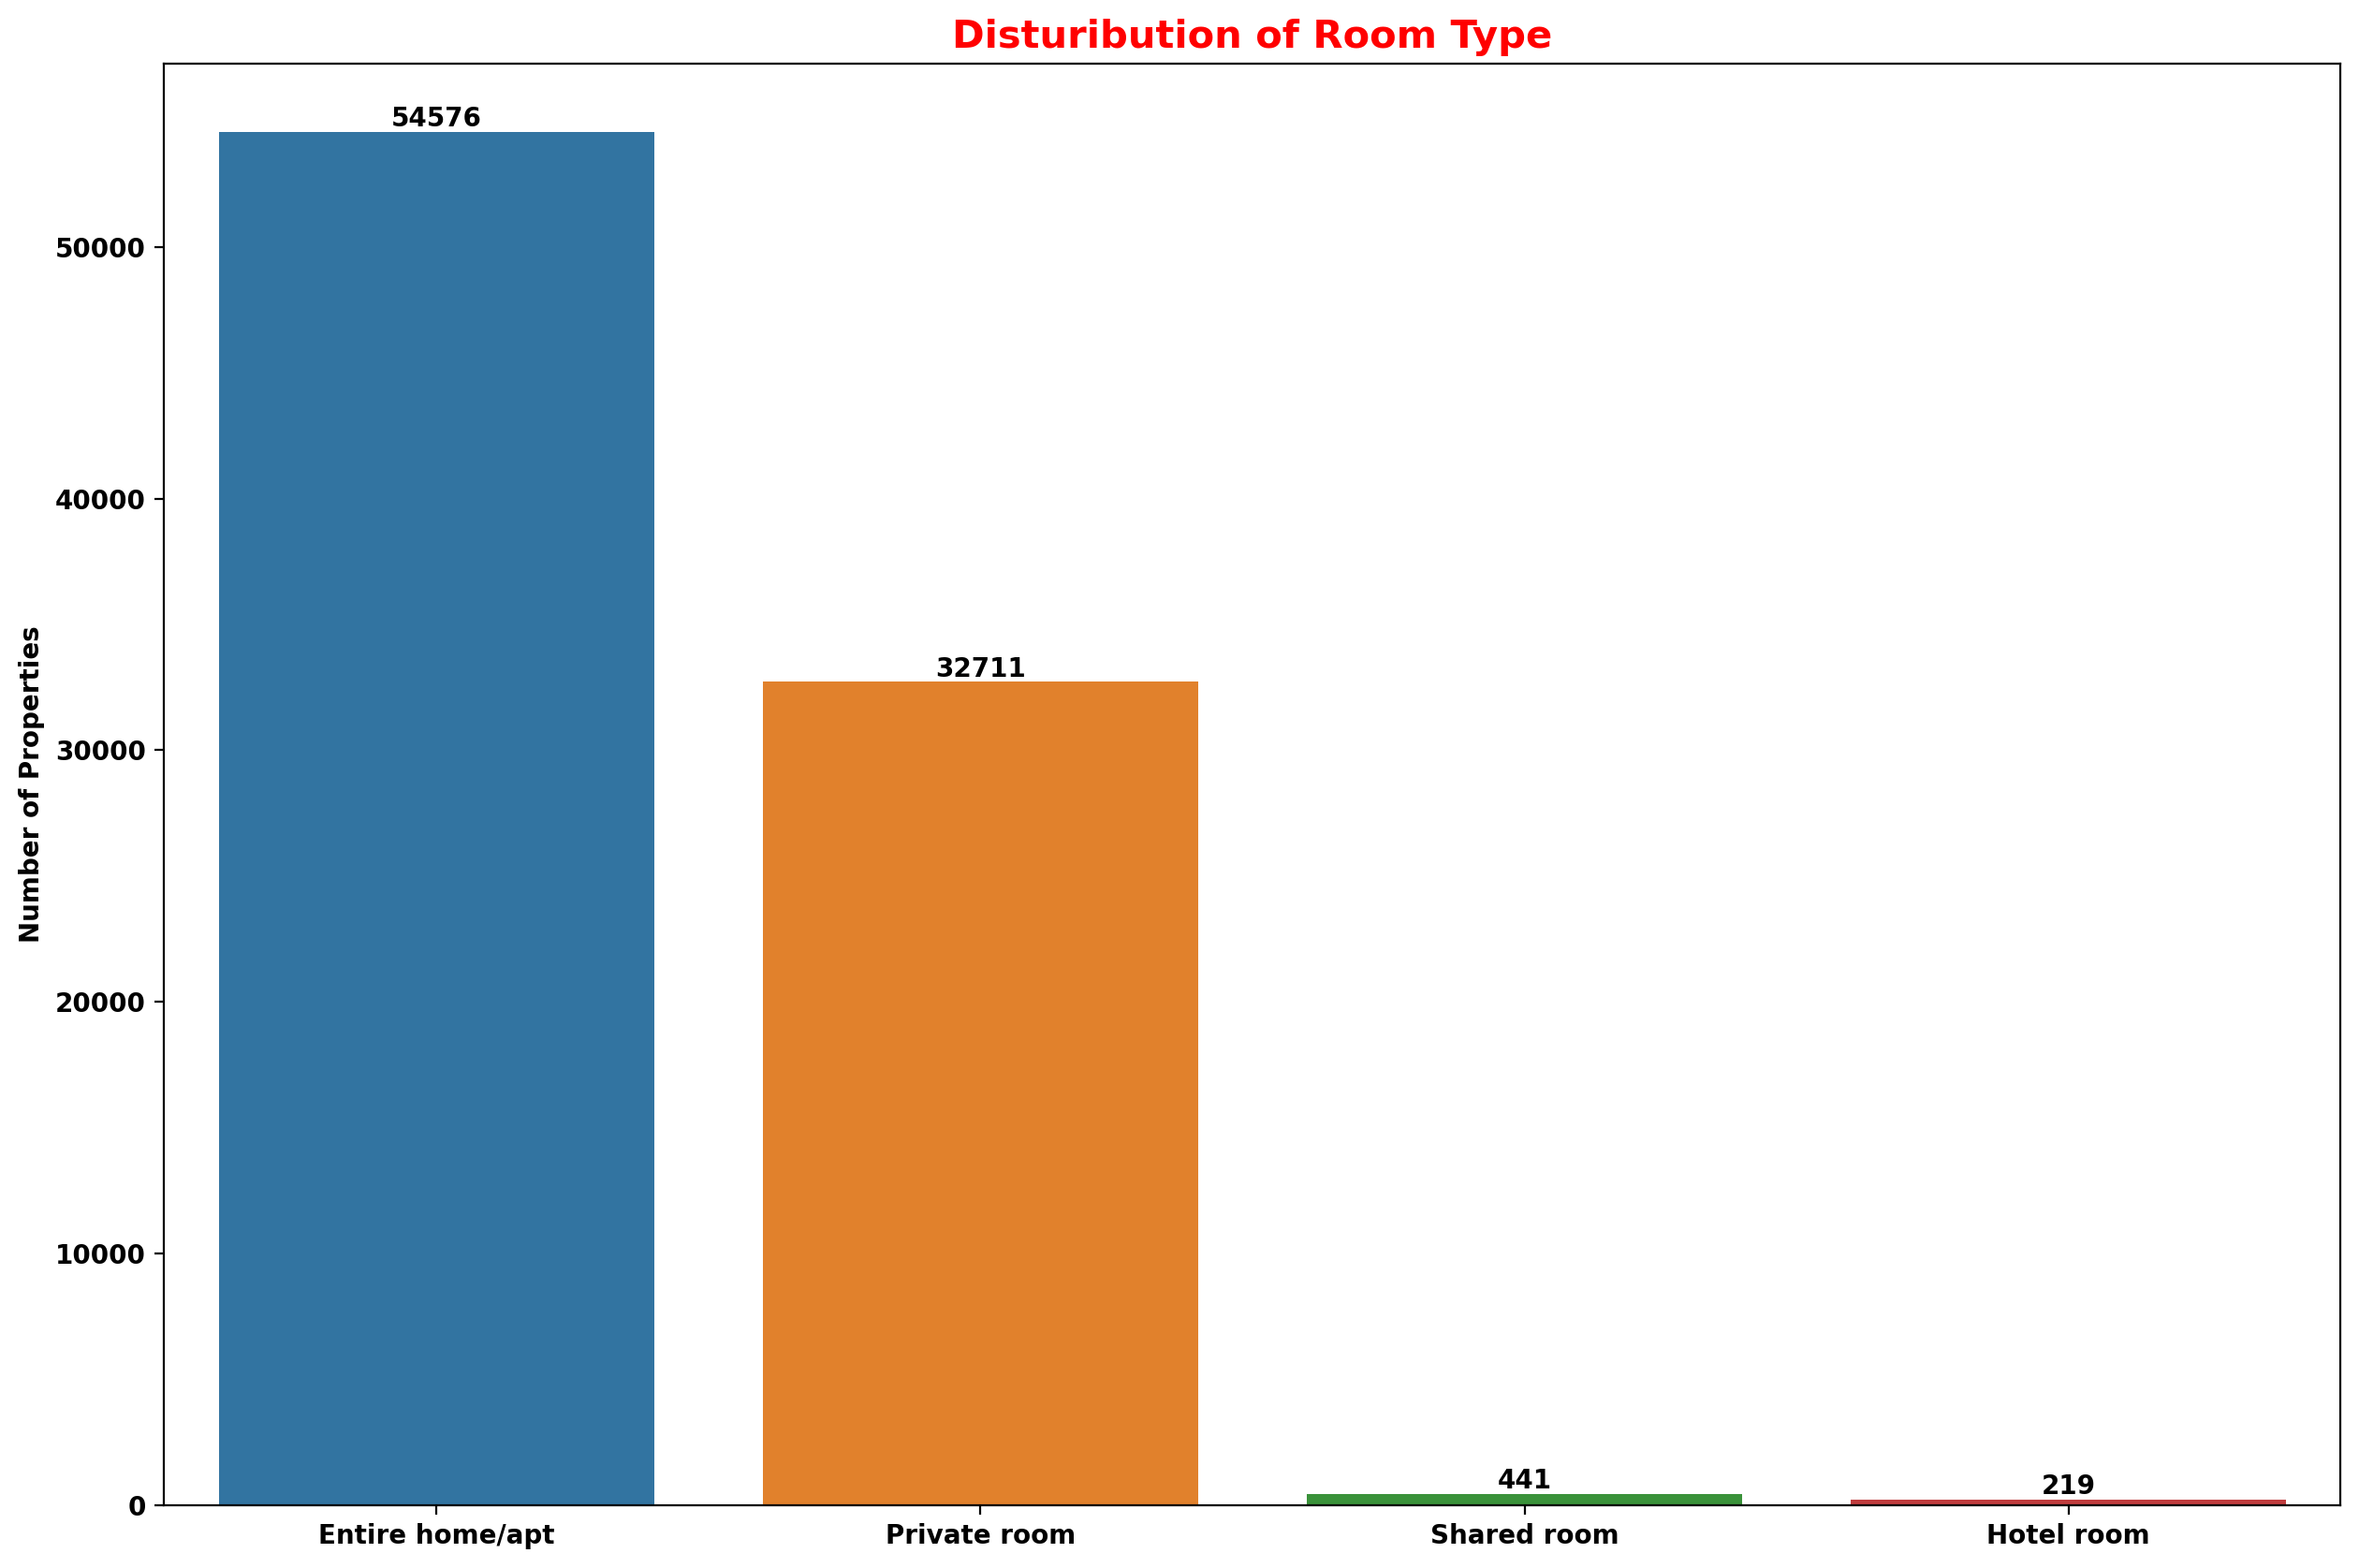

In [12]:
#Barplot of Room Type 

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="room_type", y="count", data=room_type_group_count)
plt.title("Disturibution of Room Type", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Number of Properties",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',weight="bold",
                    color= 'black')

plt.show()

Entire home/apt is the most rented type of room, with 62% of the rentals

In [13]:
room_type_group_count["income"]=listing.groupby("room_type").sum().price.values
room_type_group_count["per_income"]=round(room_type_group_count["income"] / room_type_group_count["income"].sum()*100,2)
room_type_group_count["tkt"]=round(room_type_group_count["income"] / room_type_group_count["count"],2)
room_type_group_count

C:\Users\arsnf\AppData\Local\Temp\ipykernel_17480\1773968177.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  room_type_group_count["income"]=listing.groupby("room_type").sum().price.values


room_type  count  percentage    income  per_income      tkt
0  Entire home/apt  54576       62.06  12561605       78.76   230.17
1     Private room  32711       37.19     56085        0.35     1.71
2      Shared room    441        0.50   3278663       20.56  7434.61
3       Hotel room    219        0.25     52795        0.33   241.07

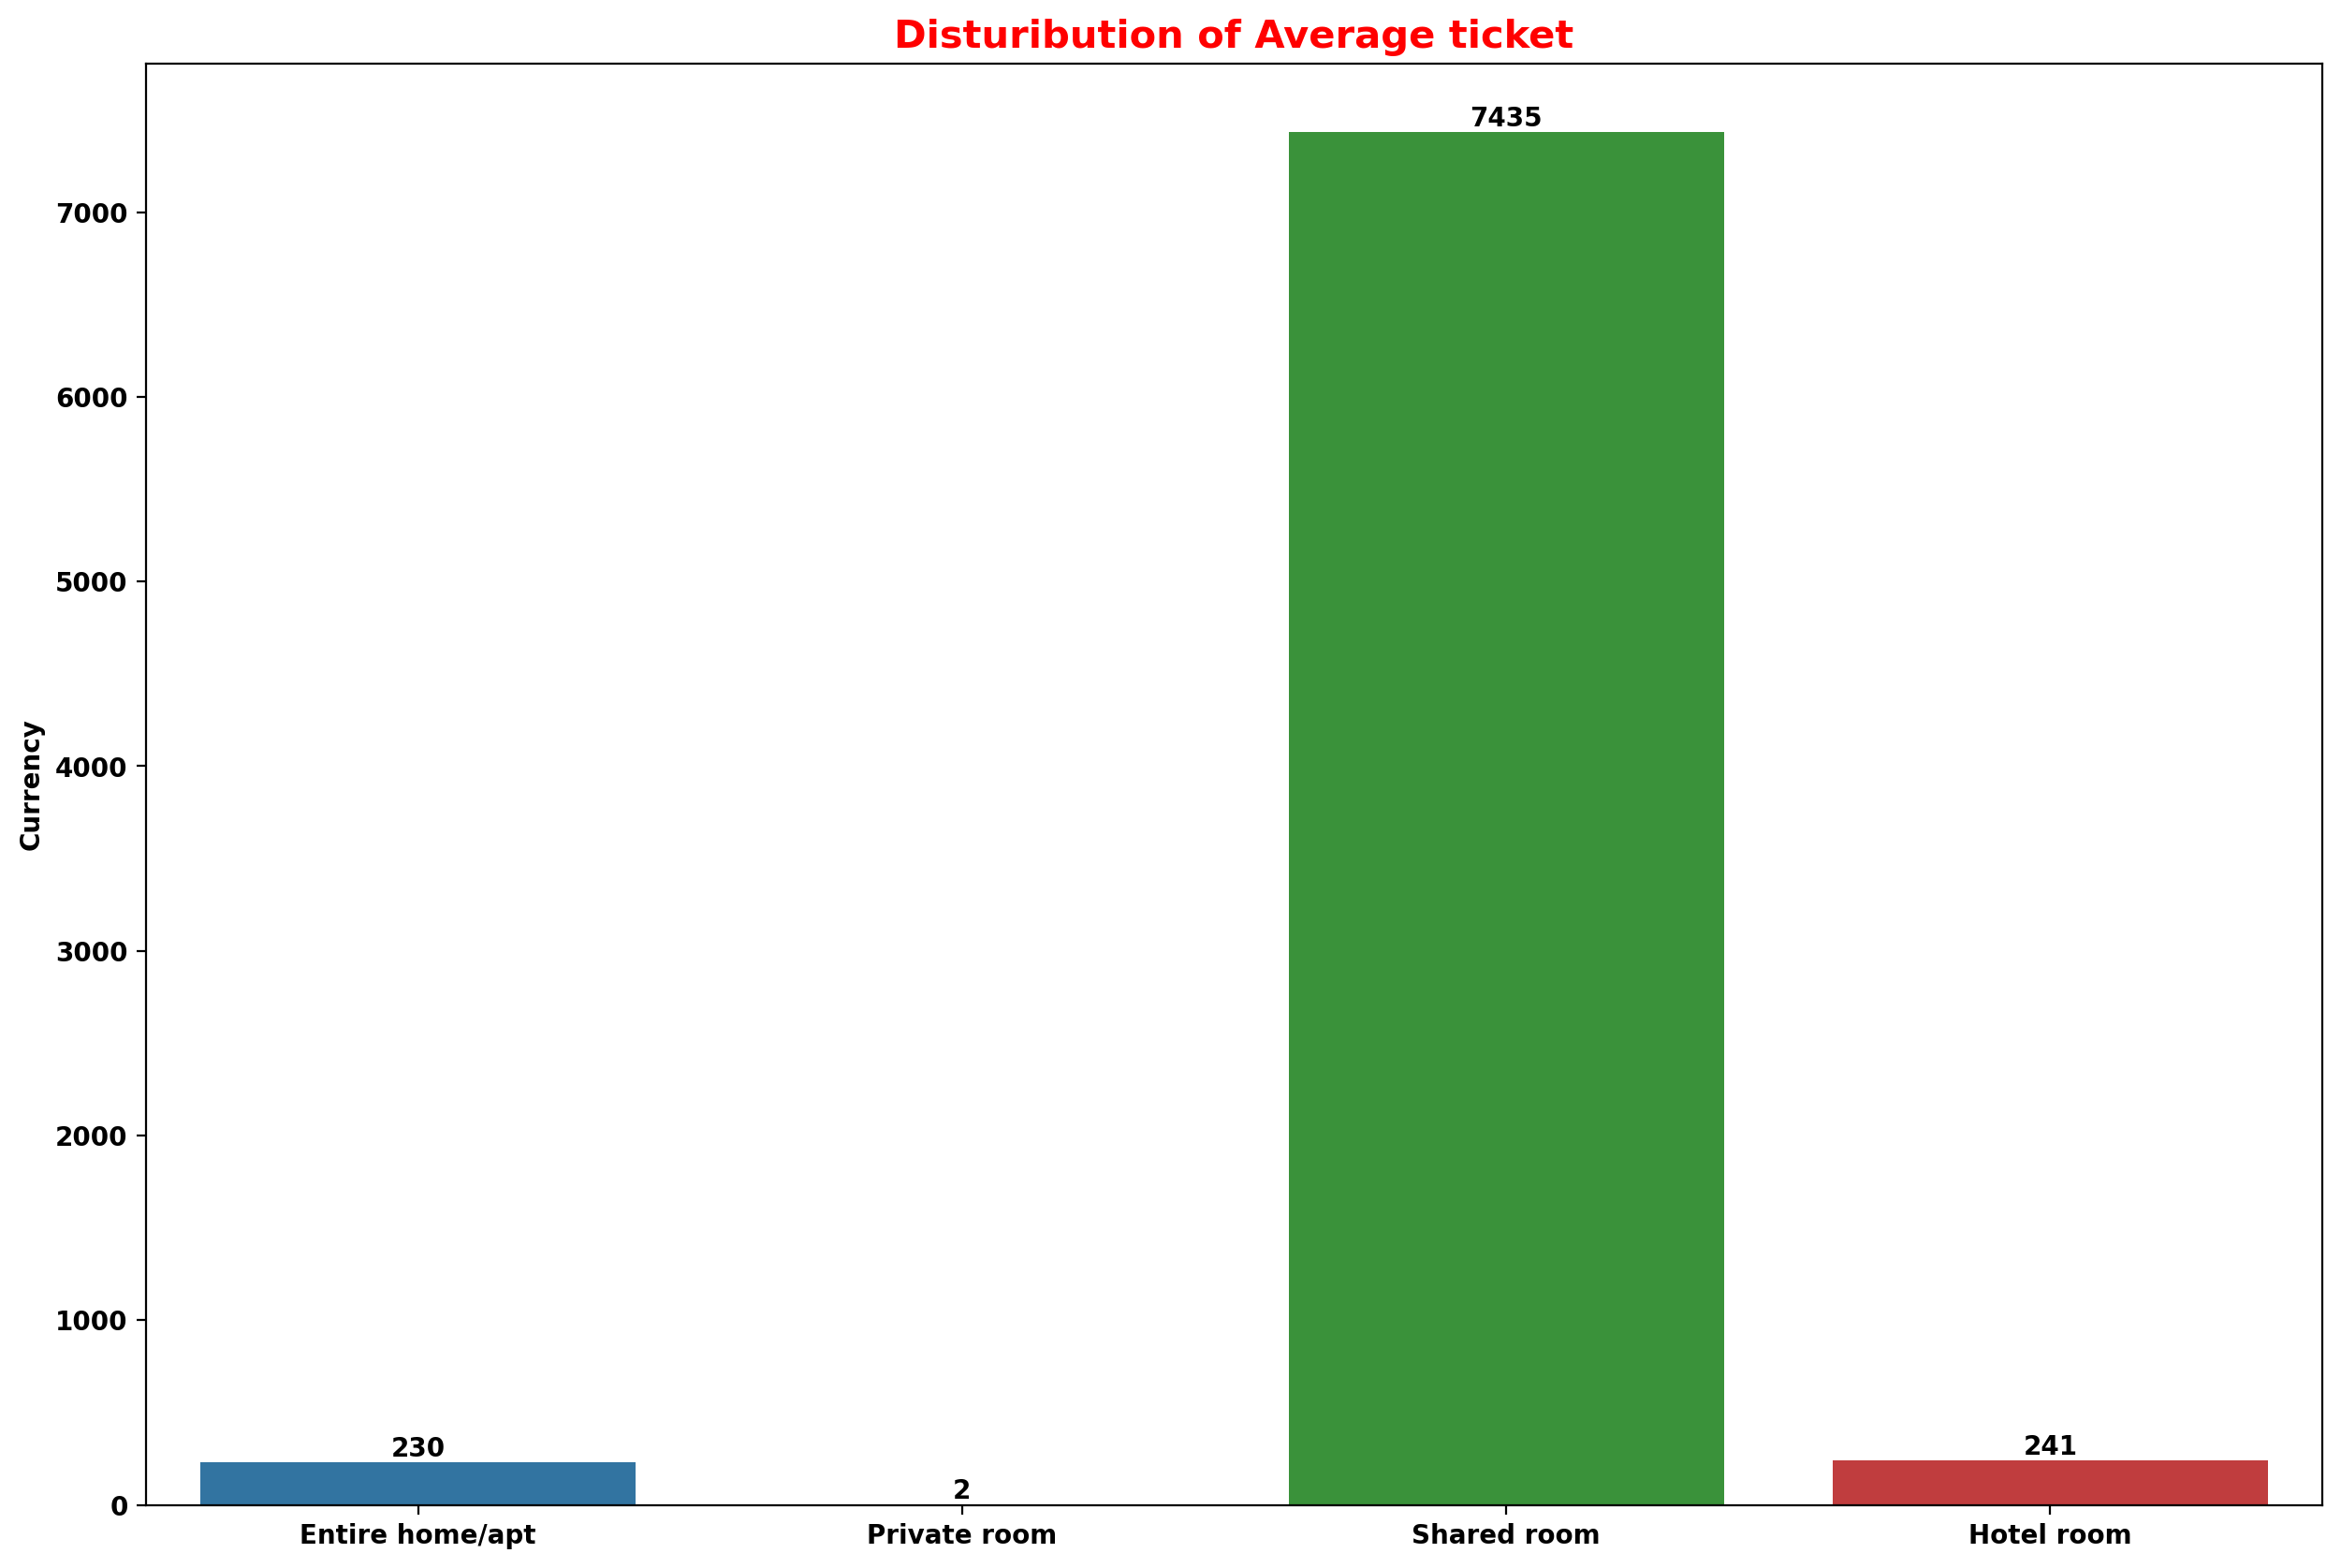

In [14]:
plt.figure(figsize=(15,10),dpi=200),
ax = sns.barplot(x="room_type", y="tkt", data=room_type_group_count)
plt.title("Disturibution of Average ticket", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Currency",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',weight="bold",
                    color= 'black')

plt.show()

Entire home/apt has the higher revenue. However, shared room has the higher average ticket, indicating that could be an important asset.

### 2 - How reviews vary with respect to the type of type of room?

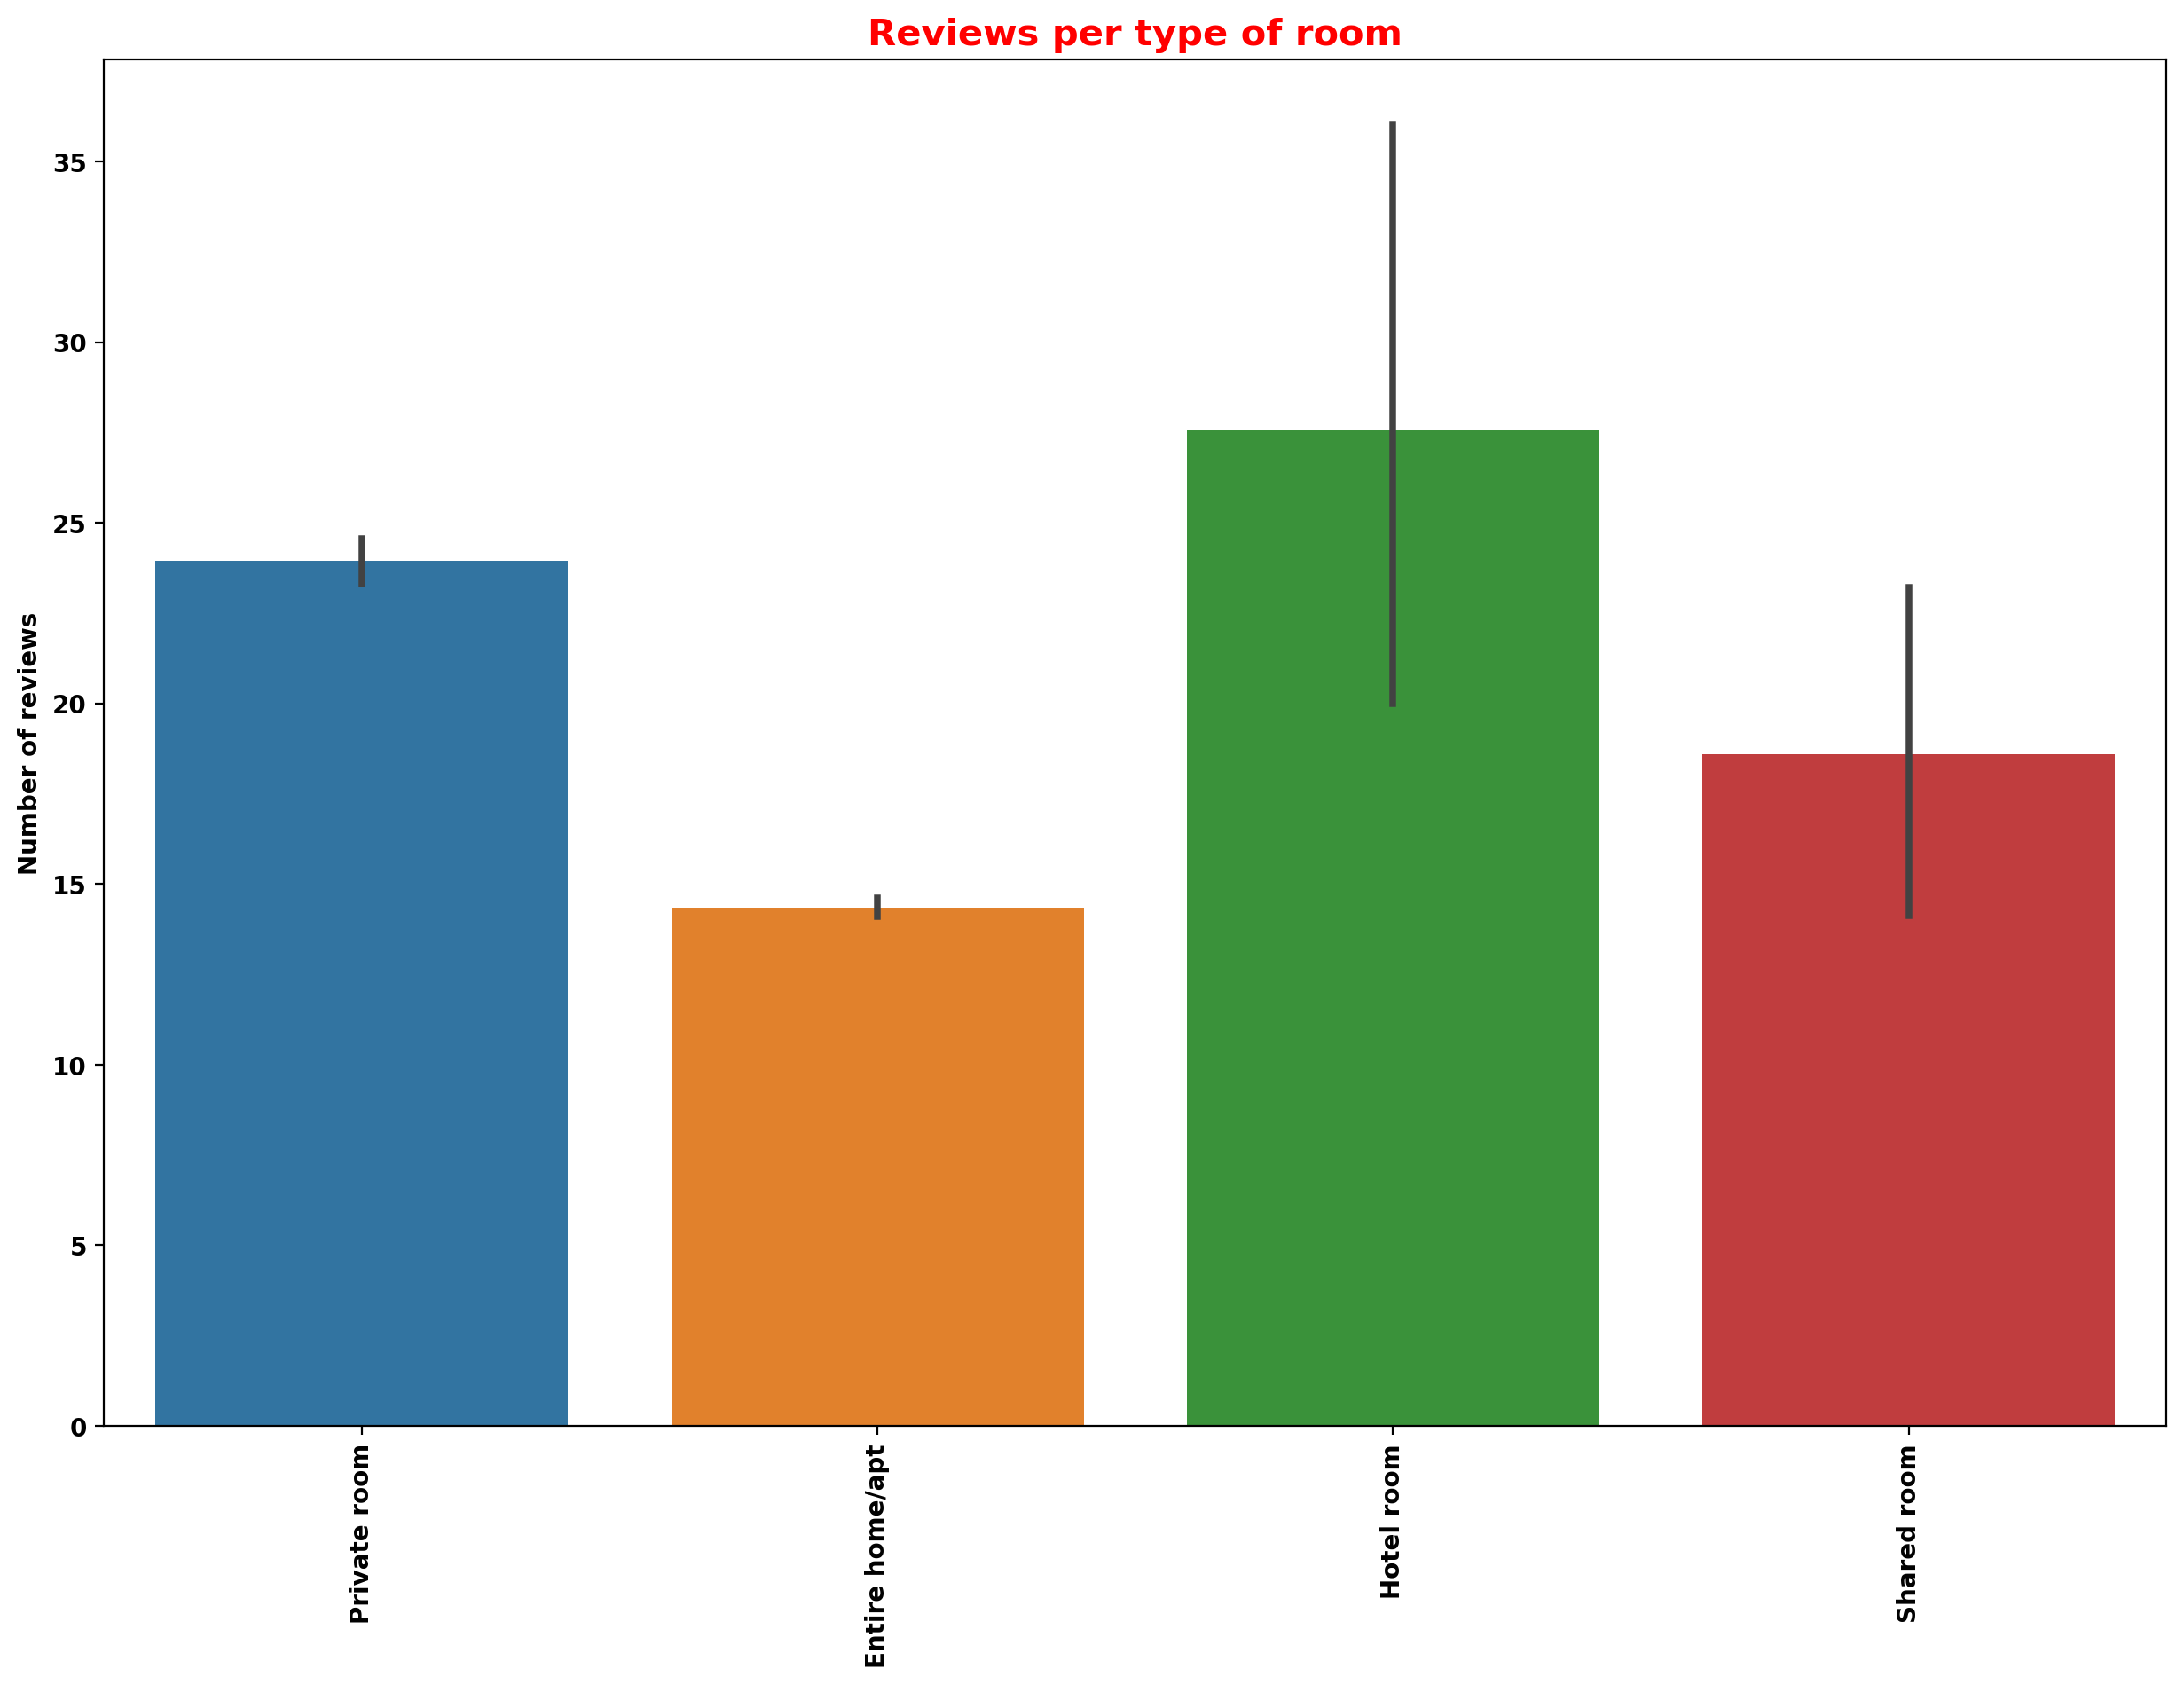

In [15]:
plt.figure(figsize=(15,10),dpi=200)
sns.barplot(x="room_type", y="number_of_reviews", data=listing)
plt.title("Reviews per type of room", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of reviews",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.show()

Entire home/apt has fewer reviews than other types.

### 3 - Which neighborhood are the most rented? And the highest revenue?

In [16]:
# Group by Borough for count

borough_group_count = listing.groupby("neighbourhood").id.count().sort_values(ascending=False)
borough_group_count = borough_group_count.reset_index()
borough_group_count.rename(columns={"id":"count"}, inplace=True)
borough_group_count["percentage"]=round(borough_group_count["count"]/borough_group_count["count"].sum()*100,2)
borough_group_count.head(10)

neighbourhood  count  percentage
0             Westminster   9992       11.36
1           Tower Hamlets   7080        8.05
2                 Hackney   6182        7.03
3  Kensington and Chelsea   5818        6.62
4                  Camden   5757        6.55
5               Southwark   5015        5.70
6                 Lambeth   4774        5.43
7               Islington   4675        5.32
8              Wandsworth   4419        5.02
9  Hammersmith and Fulham   3795        4.32

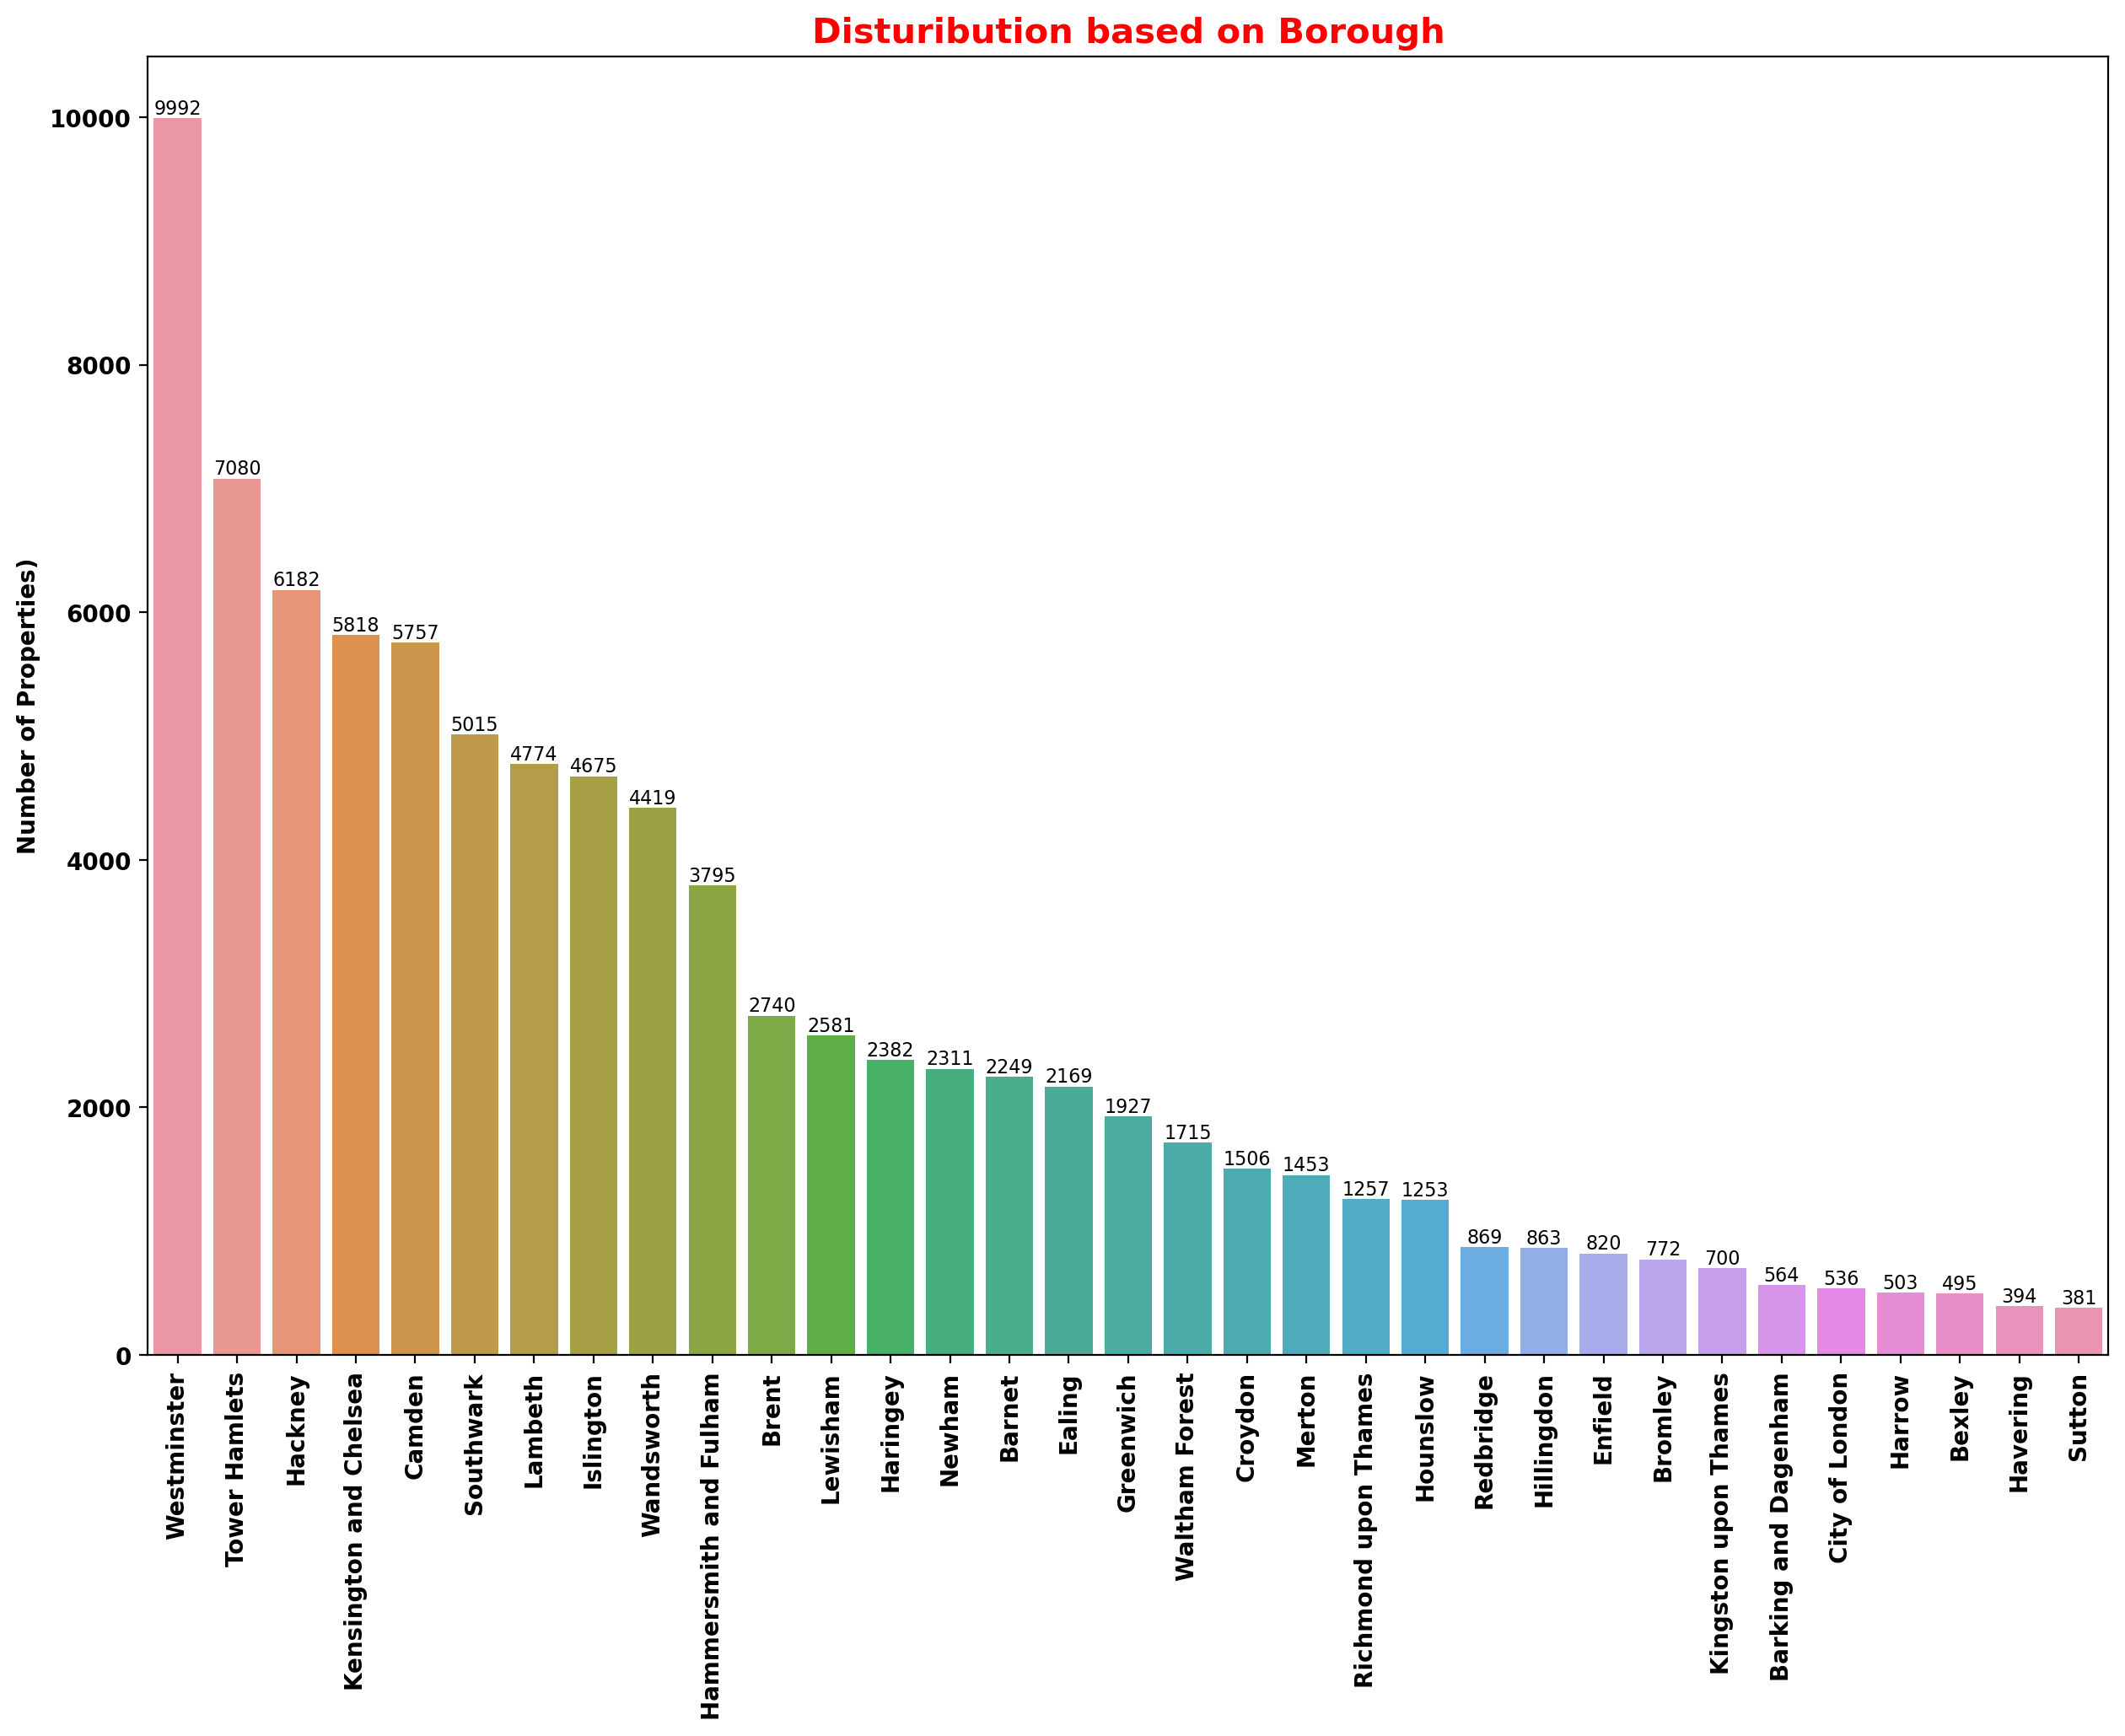

In [17]:
#Barplot of Borough 

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="neighbourhood", y="count", data=borough_group_count)
plt.title("Disturibution based on Borough", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of Properties)",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=8)

plt.show()

Westminster has the most number of rentals. Maybe the inner London has a greater demand.

In [18]:
# Group by Borough for price

borough_group_price = listing.groupby("neighbourhood").price.mean().sort_values(ascending=False)
borough_group_price = borough_group_price.reset_index()
borough_group_price.head()

neighbourhood       price
0             Westminster  320.591373
1  Kensington and Chelsea  307.432795
2    Barking and Dagenham  245.840426
3          City of London  243.722015
4                  Camden  203.288171

In [19]:
avg_price = round(listing.price.mean(),2)
avg_price

181.35

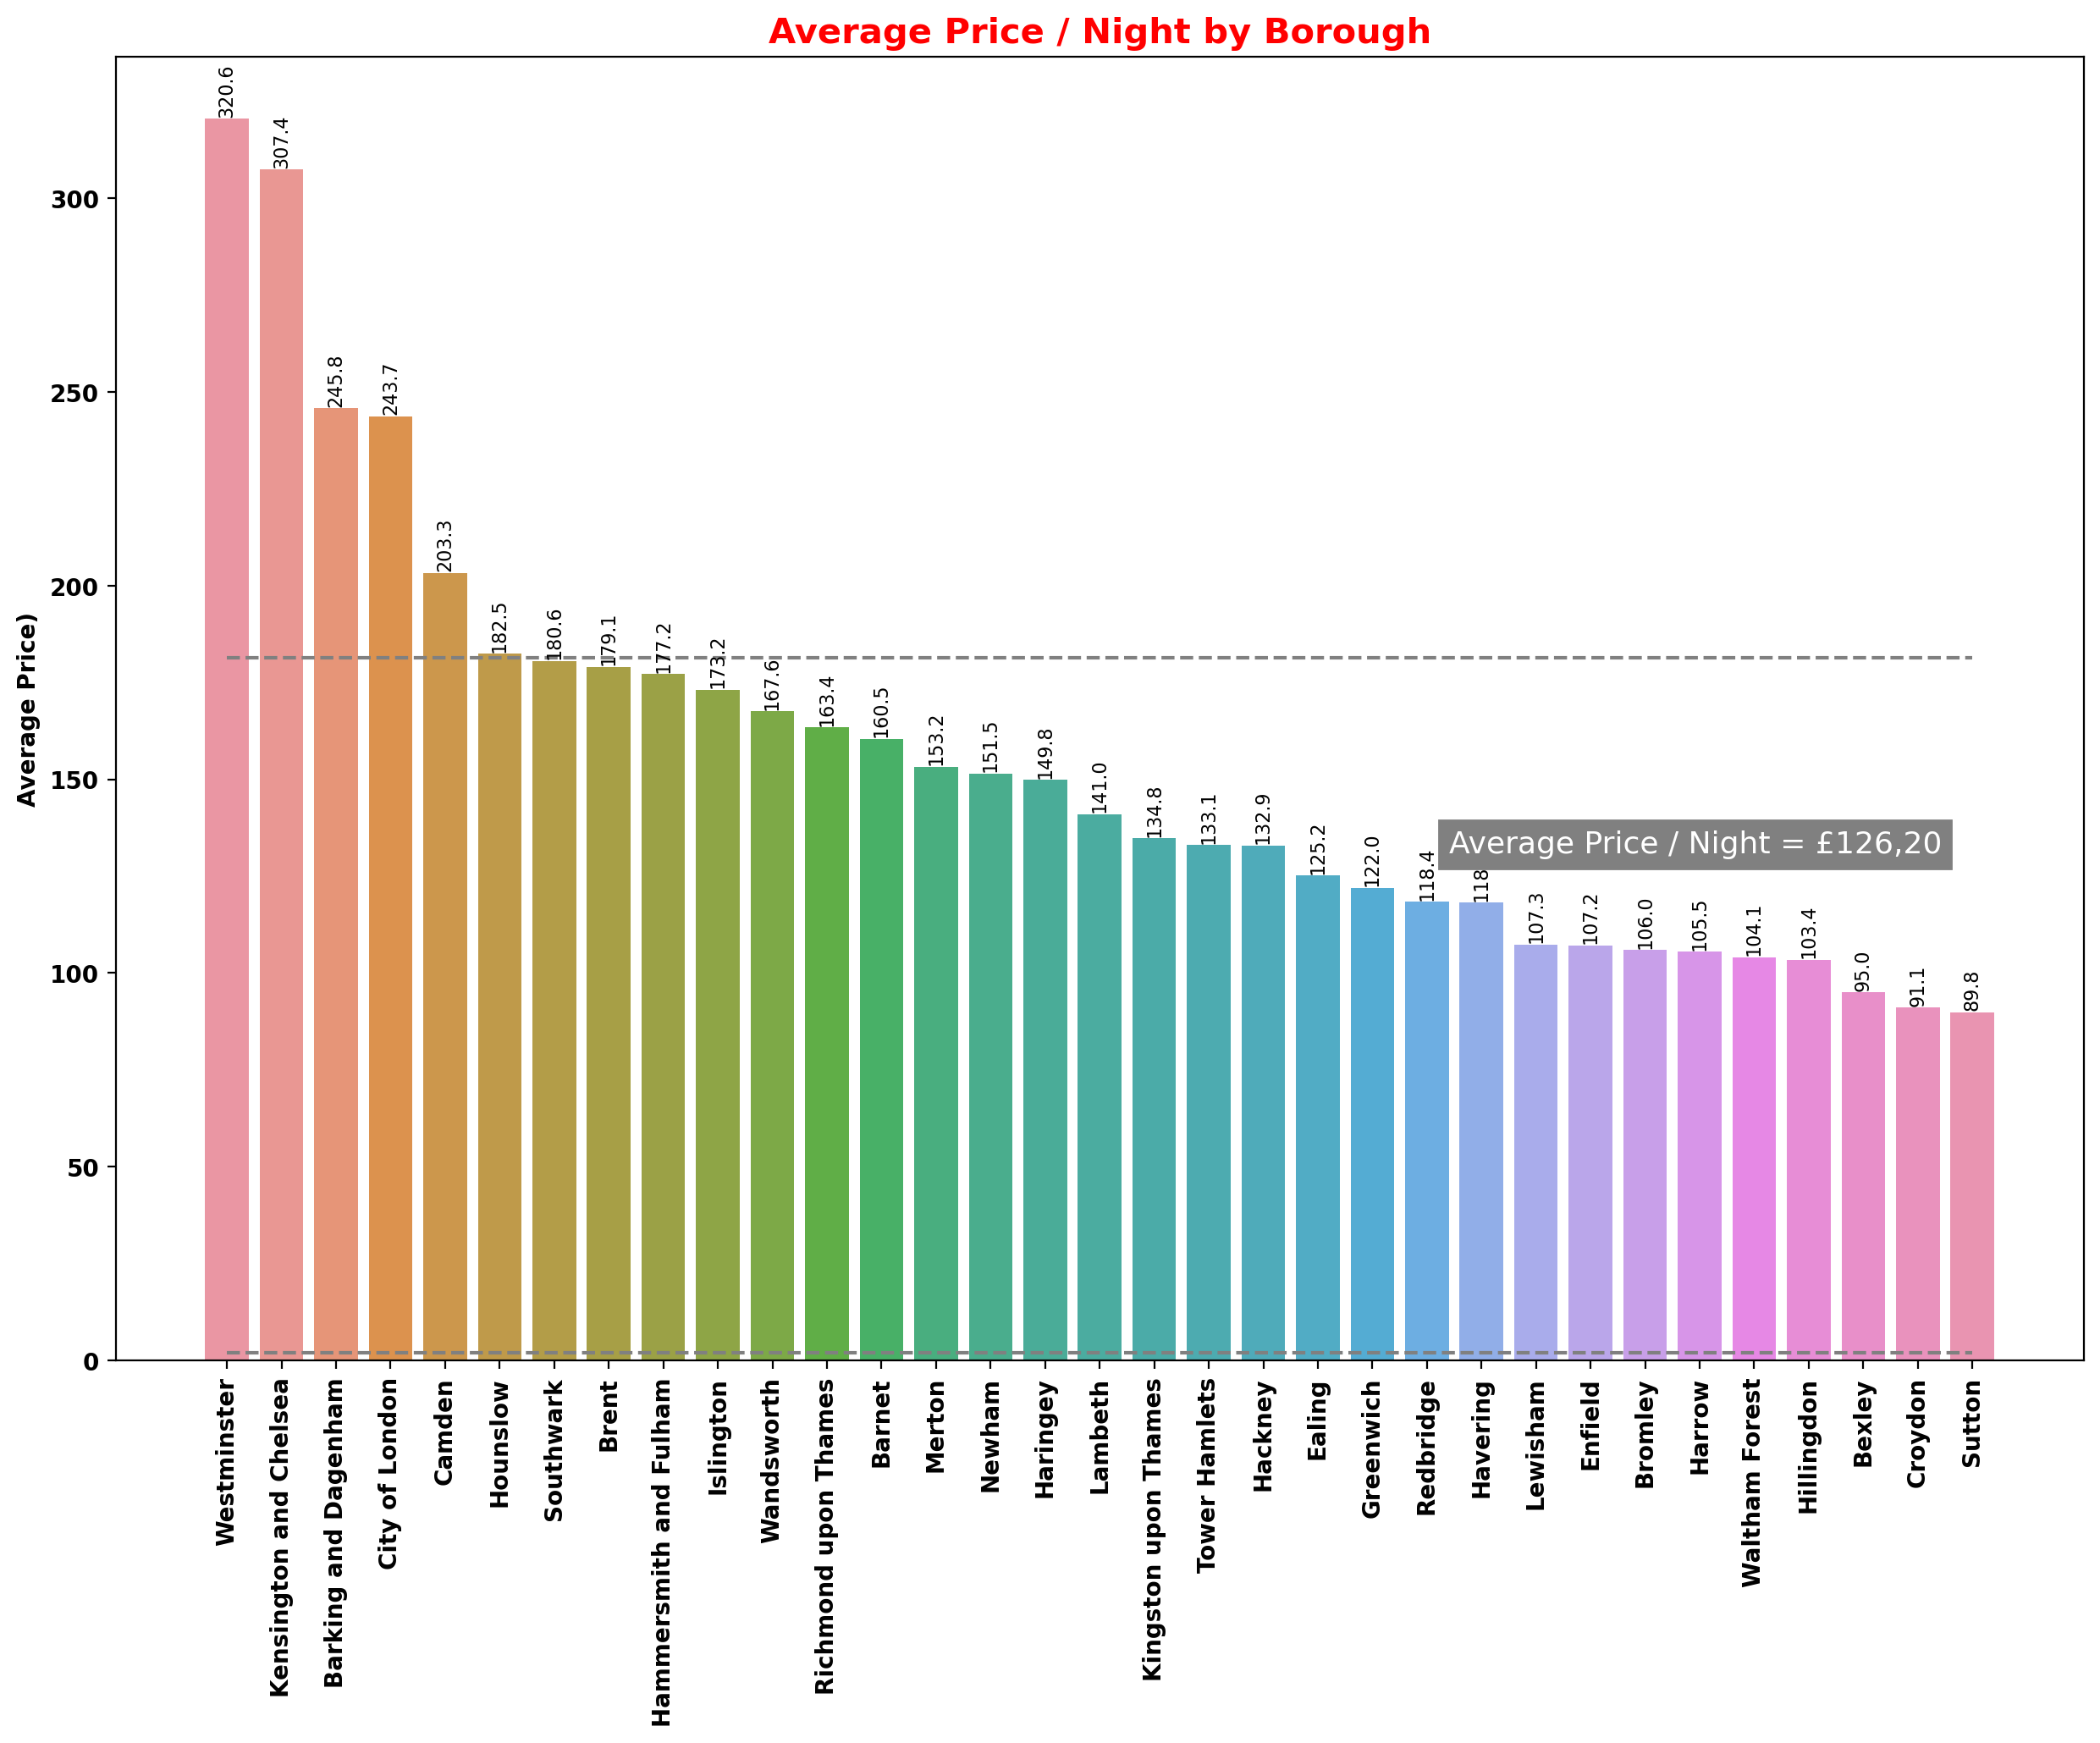

In [20]:
# Barplot of Borough's Price/Night

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="neighbourhood", y="price", data=borough_group_price)
plt.title("Average Price / Night by Borough", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Average Price)",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.5),
                    ha='center', va='bottom',
                    color= 'black', size=8, rotation=90)

x_coordinates = [0, 32]
y_median = [(listing.price.mean(),2), (listing.price.mean(),2)]

plt.plot(x_coordinates, y_median,linestyle = '--', c="gray")
plt.text(22.4,131,'Average Price / Night = £126,20',fontsize = 13,backgroundcolor = 'gray',color = 'white')



plt.show()


Westminster has the higher price. So, the inner London has a greater demand.

### 4 - How reviews vary with respect to the type of neighbourhood?

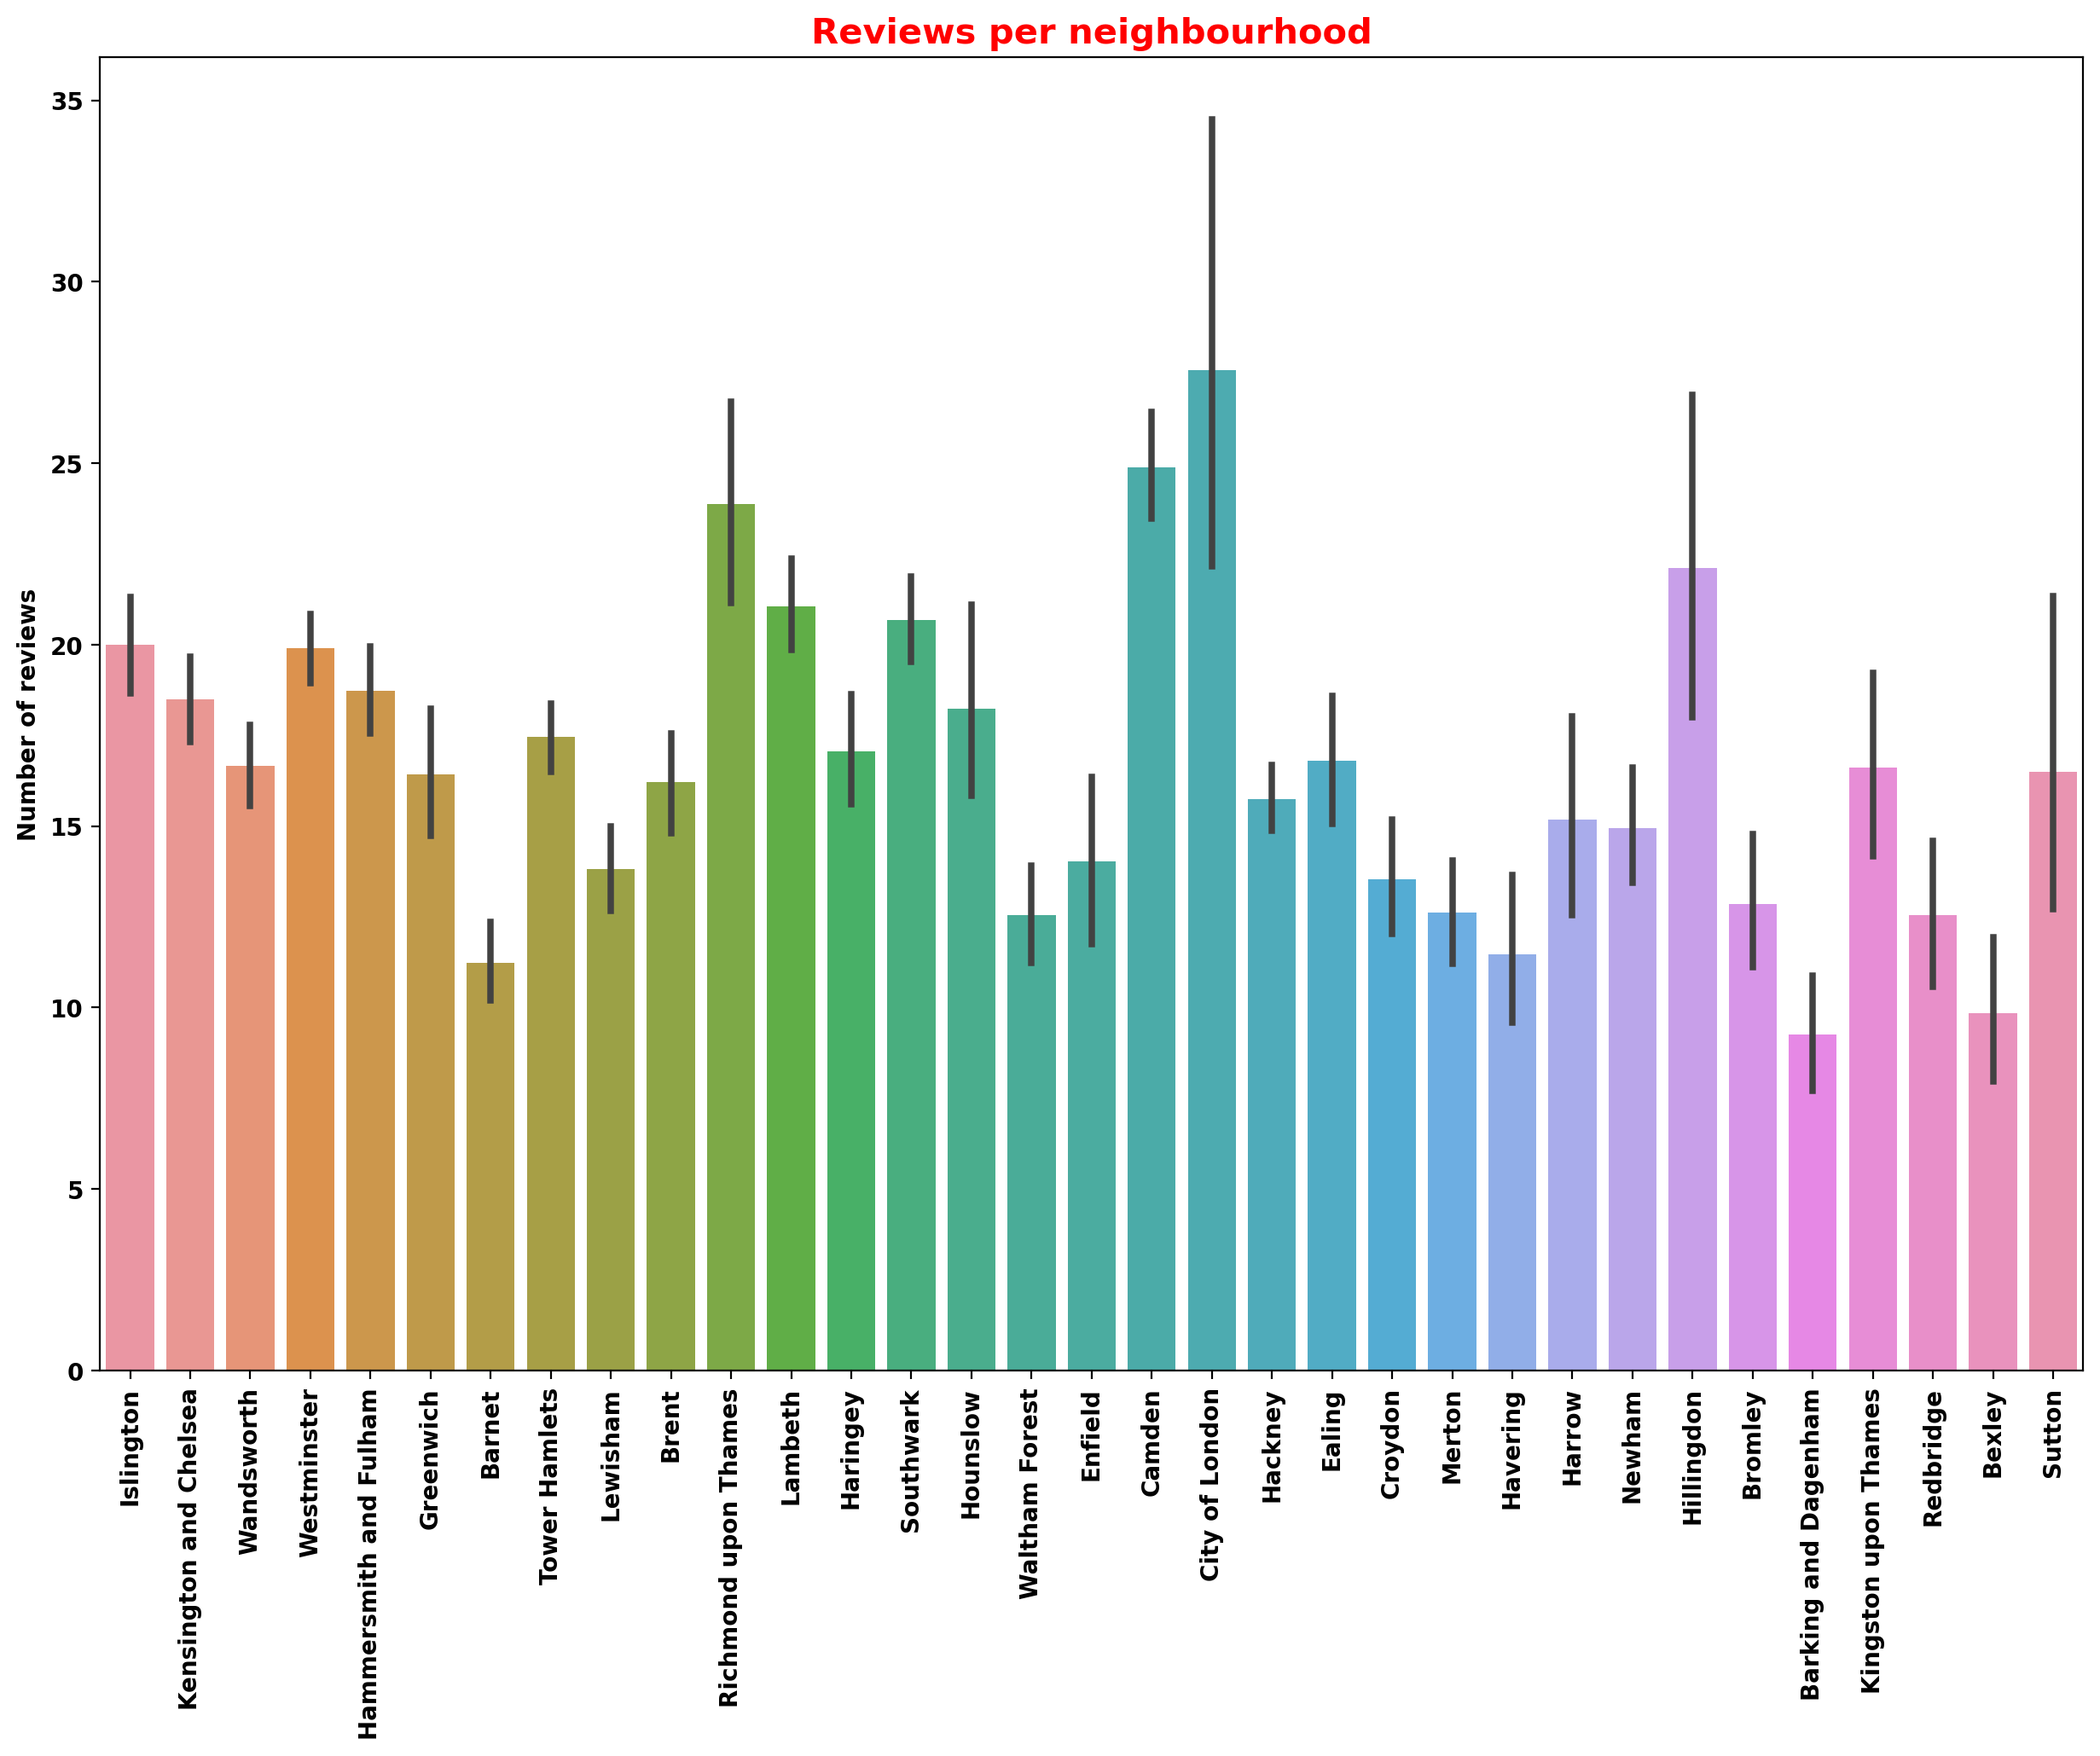

In [21]:
plt.figure(figsize=(15,10),dpi=200)
sns.barplot(x="neighbourhood", y="number_of_reviews", data=listing)
plt.title("Reviews per neighbourhood", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of reviews",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.show()

Westminster and City of London have a high number of reviews, agreeing with the inner London greater demand.

### 5 - Which types of rooms and neighborhoods have the most availability?

In [22]:
#Availability Per Borough of 365 day

occupancy_borough = listing.groupby("neighbourhood").availability_365.mean().sort_values(ascending = False).reset_index()
occupancy_borough.head(10)

neighbourhood  availability_365
0                Bexley        208.476768
1              Havering        203.200508
2            Hillingdon        190.877173
3               Enfield        183.941463
4  Barking and Dagenham        173.608156
5                Harrow        172.763419
6             Redbridge        169.139241
7               Croydon        166.367198
8               Bromley        156.742228
9              Hounslow        155.754190

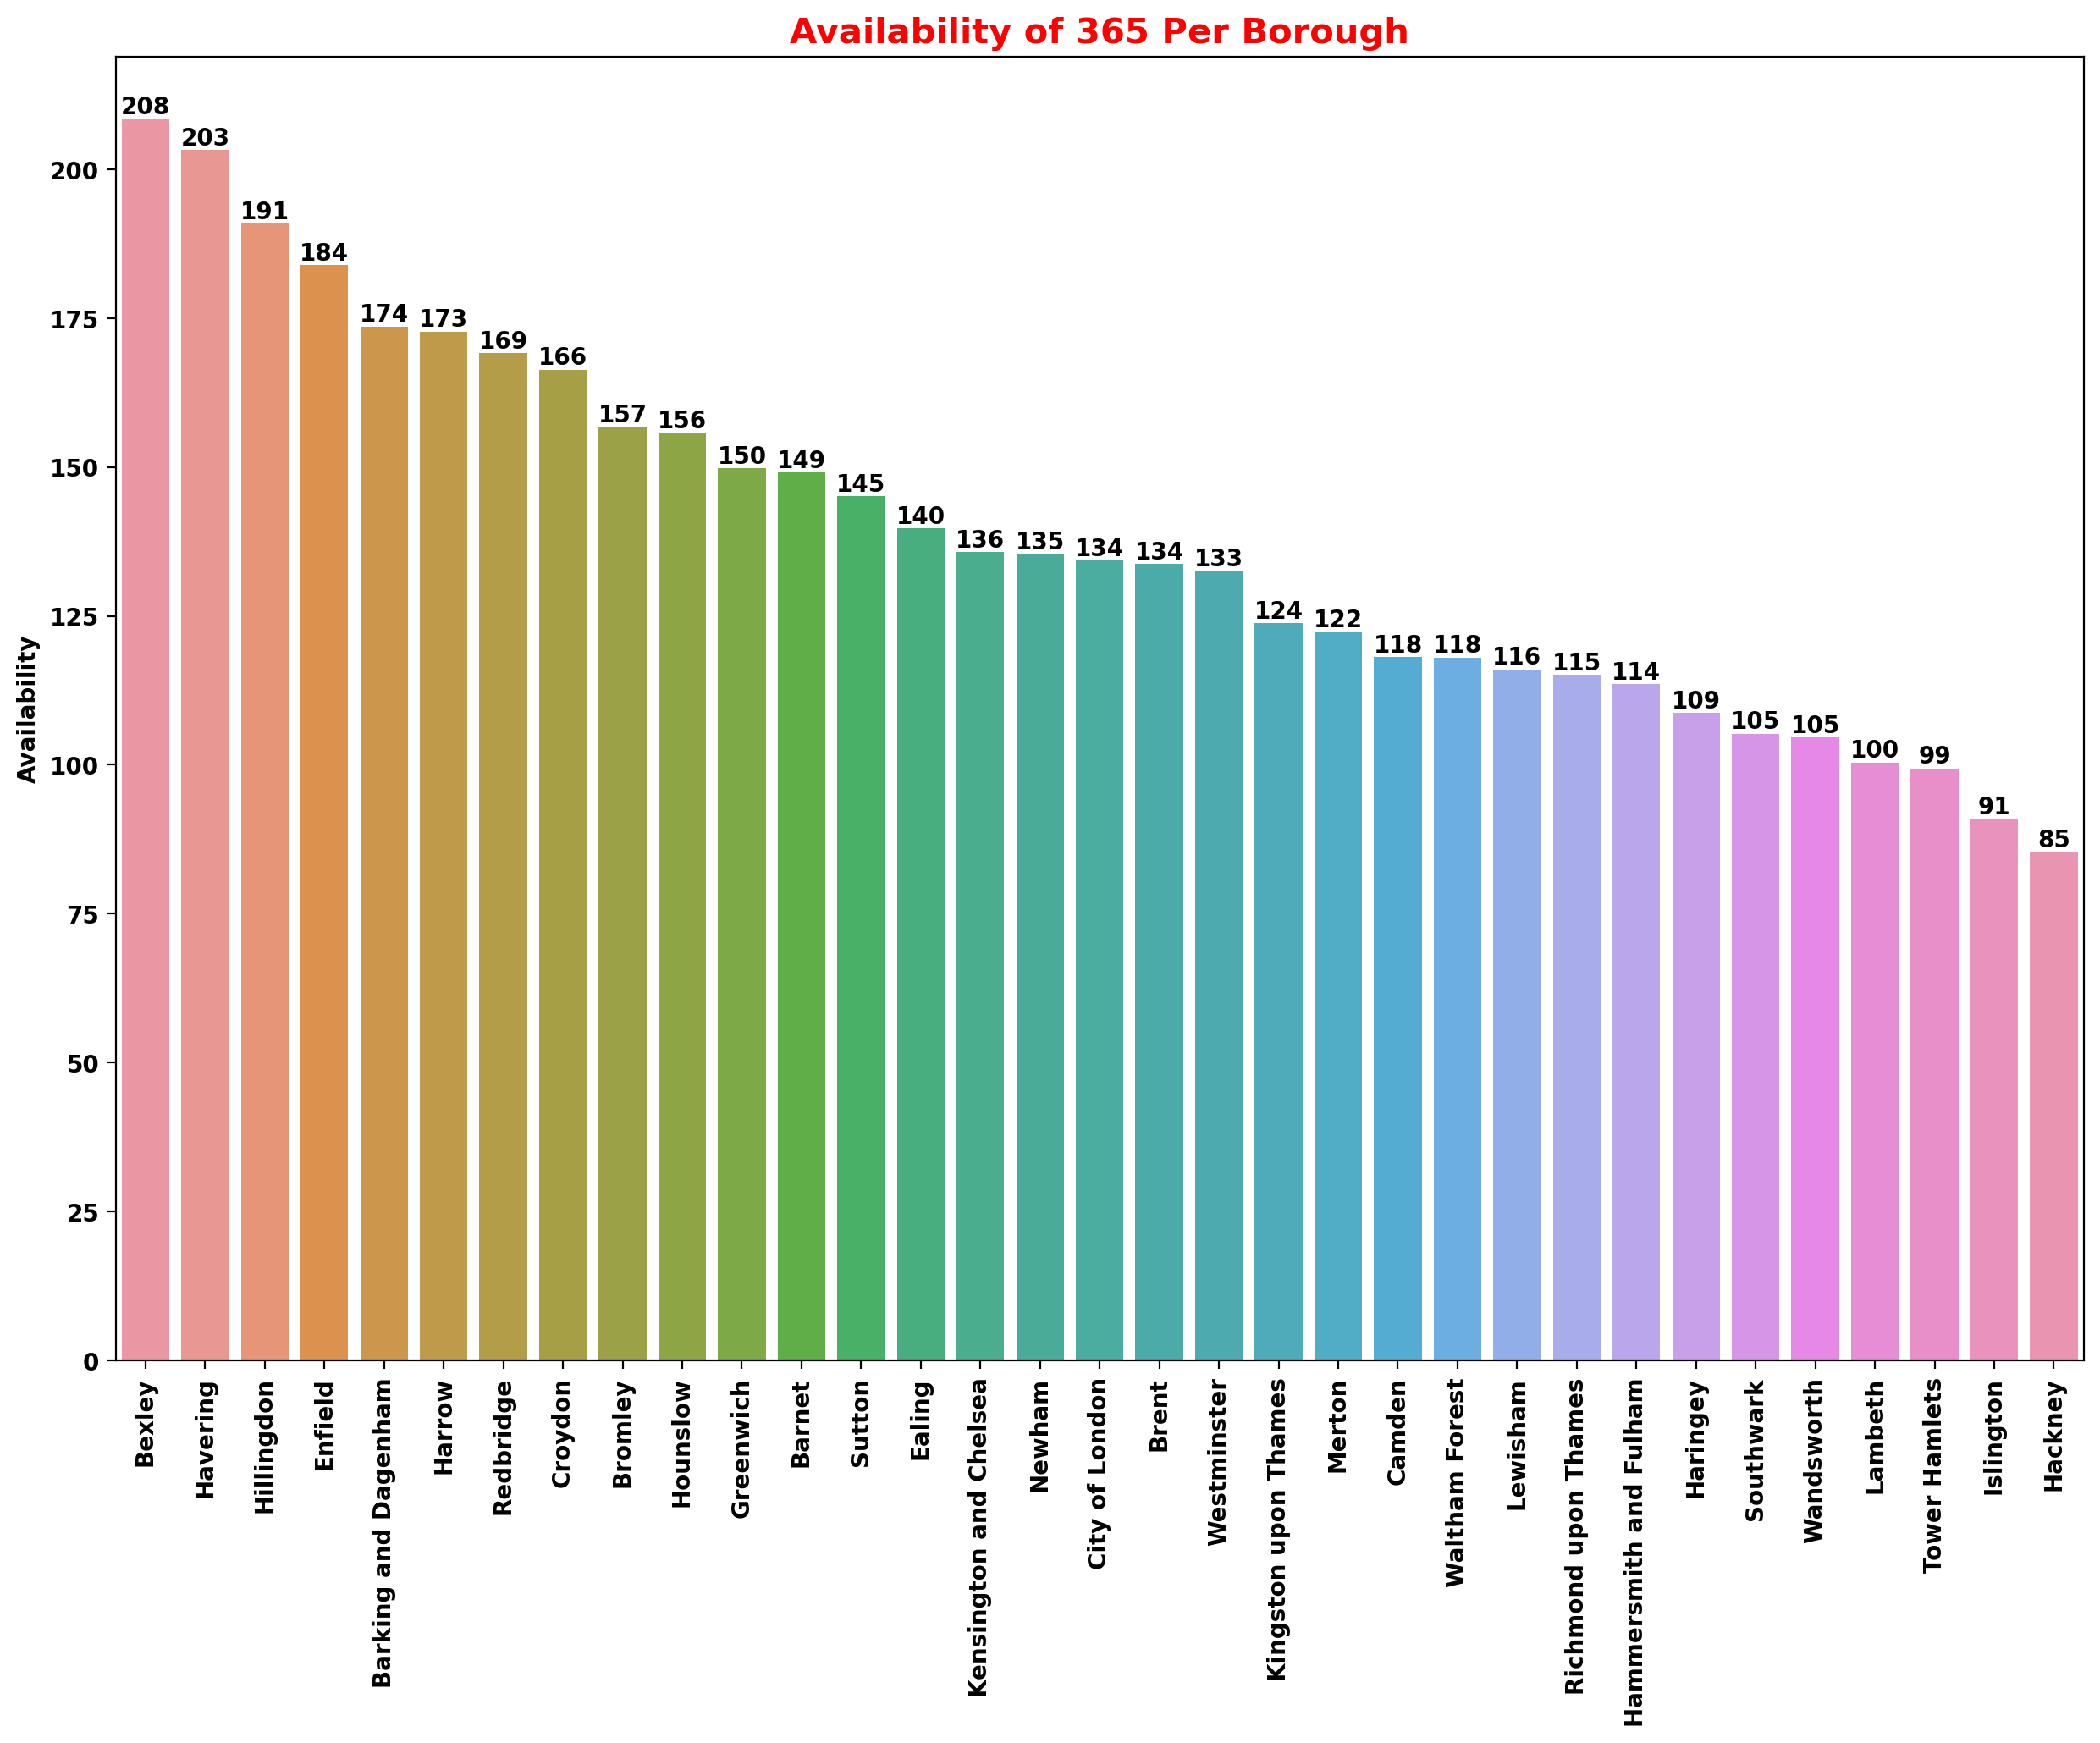

In [23]:
# Barplot of #Availability Per Borough

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="neighbourhood", y="availability_365", data=occupancy_borough)
plt.title("Availability of 365 Per Borough", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Availability",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=10, weight="bold")

plt.show()

Bexley is the neighborhood with the most availability

In [24]:
#Availability Per type of room of 365 day

occupancy_room = listing.groupby("room_type").availability_365.mean().sort_values().reset_index()
occupancy_room.head()

room_type  availability_365
0     Private room        117.521262
1      Shared room        122.551020
2  Entire home/apt        122.945672
3       Hotel room        199.022831

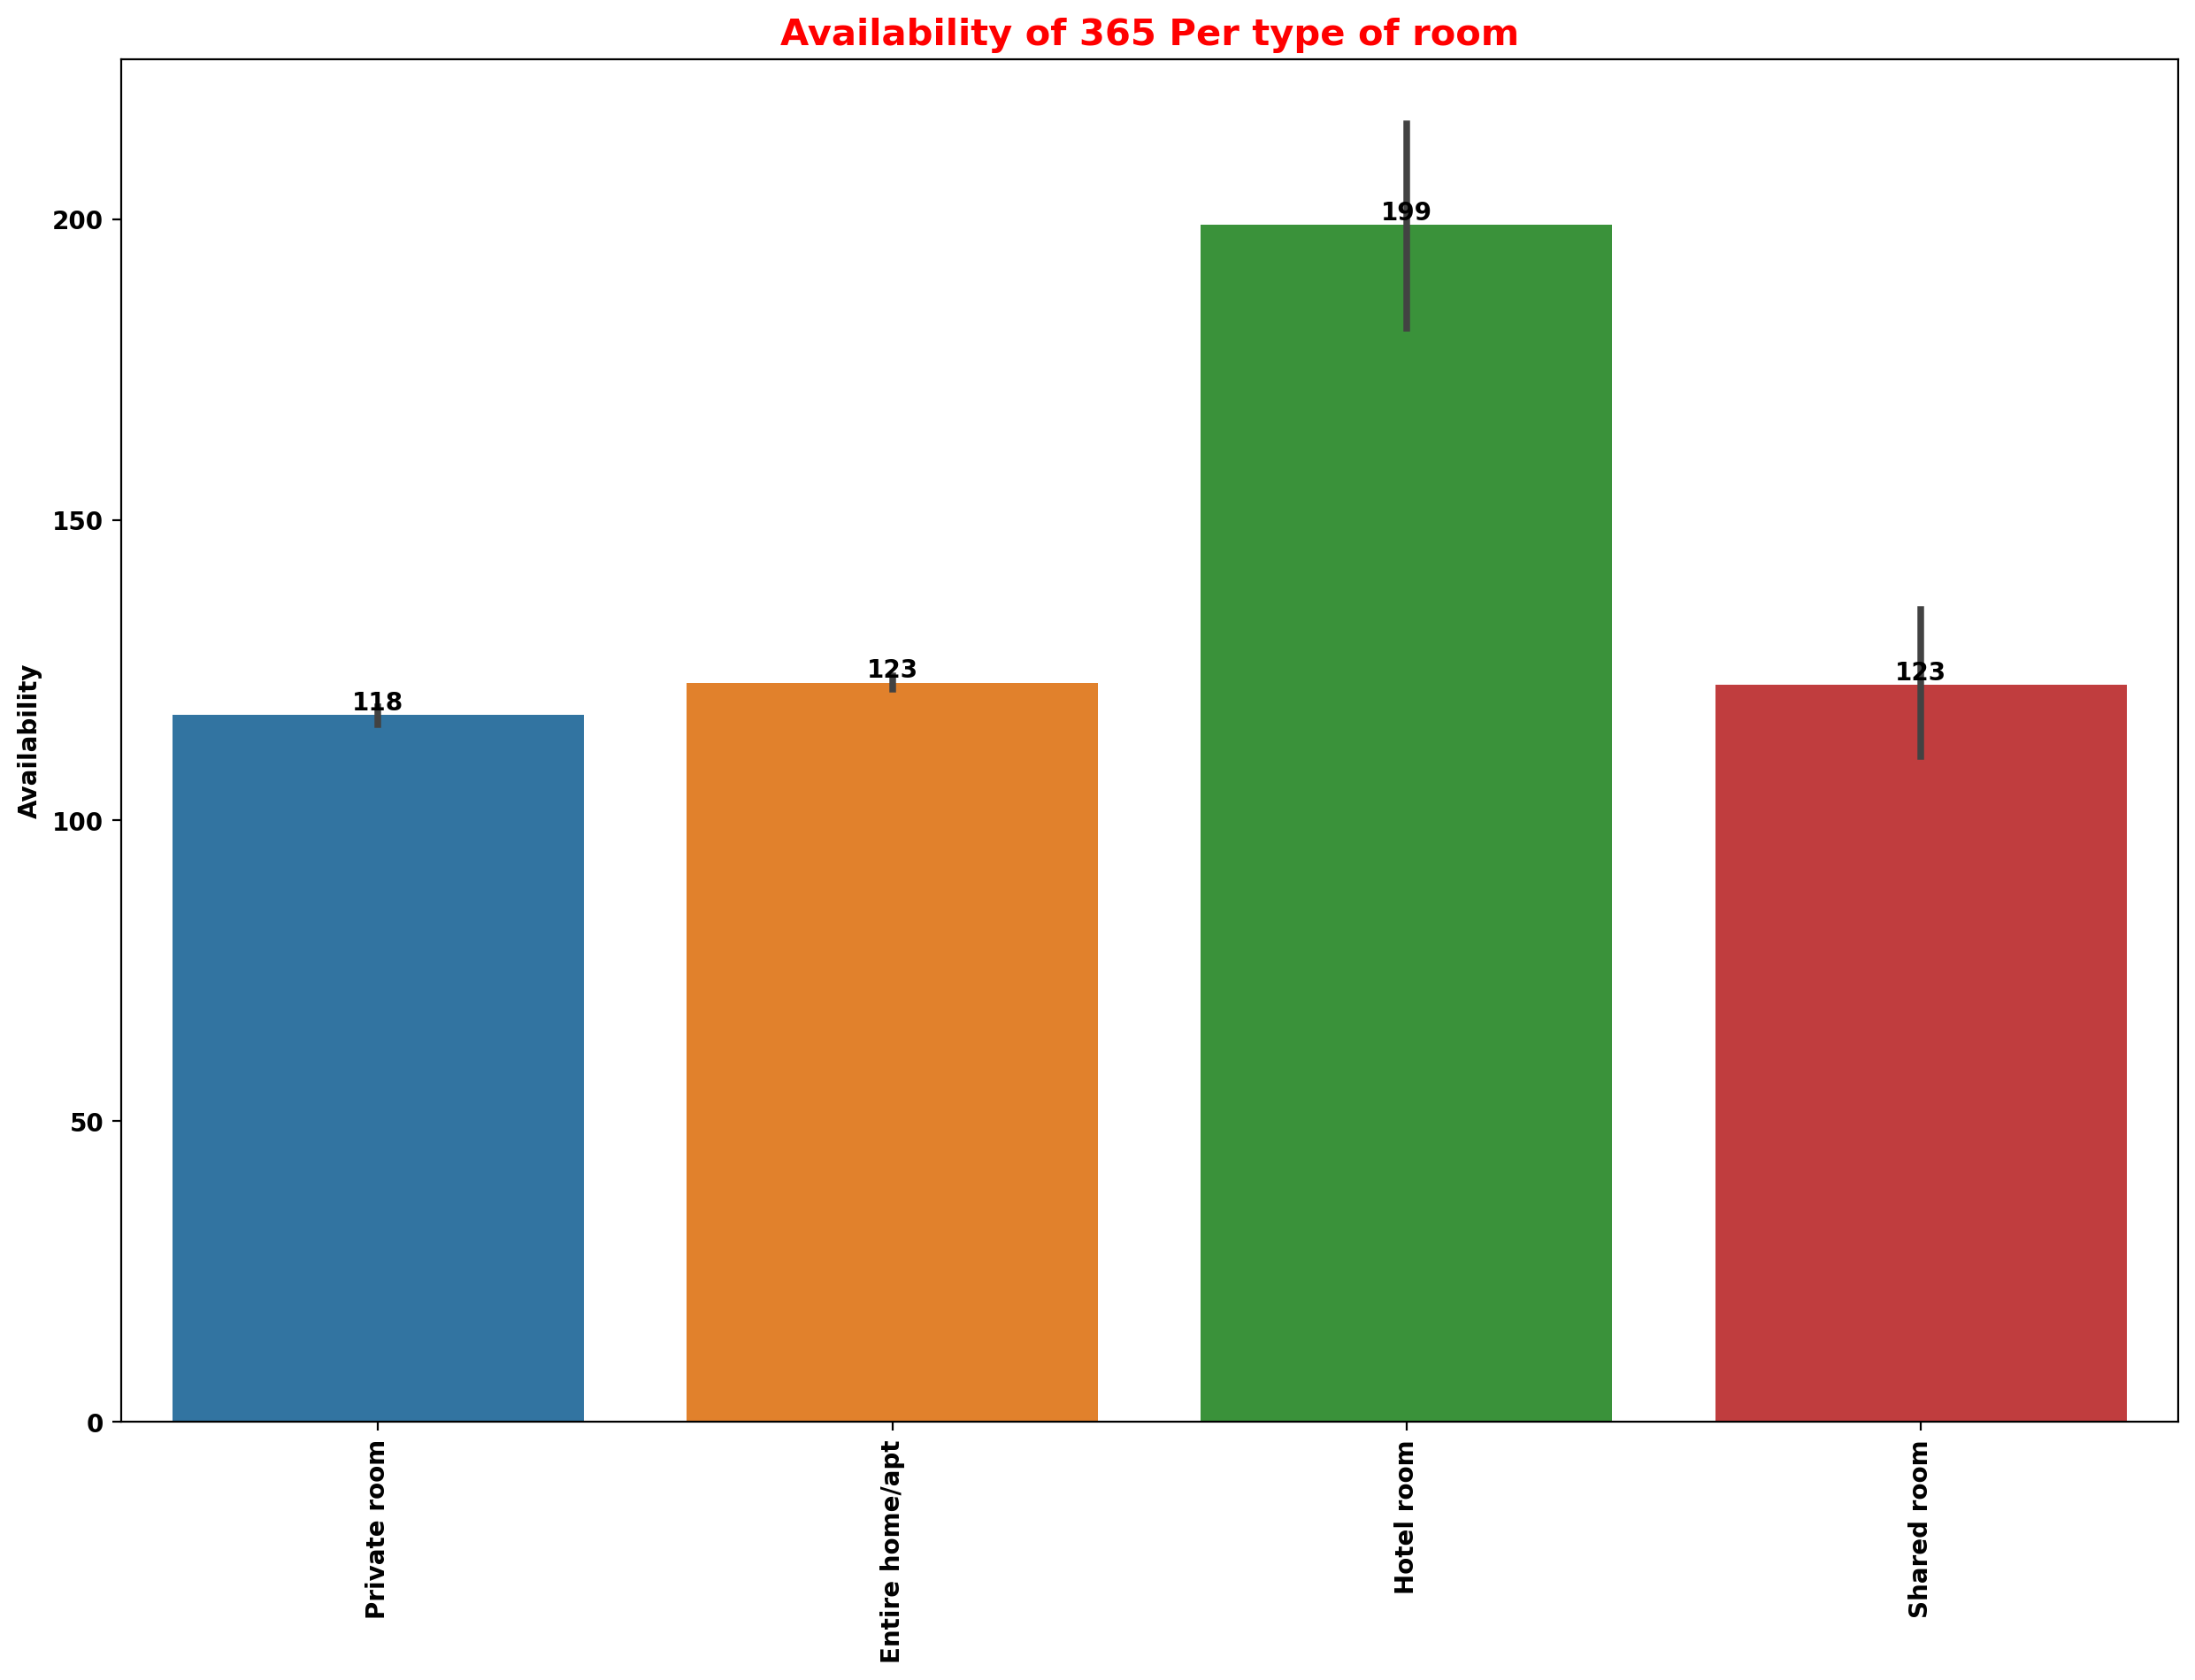

In [25]:
# Barplot of #Availability Per type of room

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="room_type", y="availability_365", data=listing)
plt.title("Availability of 365 Per type of room", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Availability",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=10, weight="bold")

plt.show()

Hotel room is the type of room with the most availability

### 6 - Which type of rooms have the best revenue x availability? And the neighborhoods?

In [26]:
room_type_group_count["availability"]=occupancy_room.availability_365.values
room_type_group_count["prof_avai"]=round(room_type_group_count["income"] / room_type_group_count["availability"],2)

room_type_group_count

room_type  count  percentage    income  per_income      tkt  \
0  Entire home/apt  54576       62.06  12561605       78.76   230.17   
1     Private room  32711       37.19     56085        0.35     1.71   
2      Shared room    441        0.50   3278663       20.56  7434.61   
3       Hotel room    219        0.25     52795        0.33   241.07   

   availability  prof_avai  
0    117.521262  106887.93  
1    122.551020     457.65  
2    122.945672   26667.58  
3    199.022831     265.27

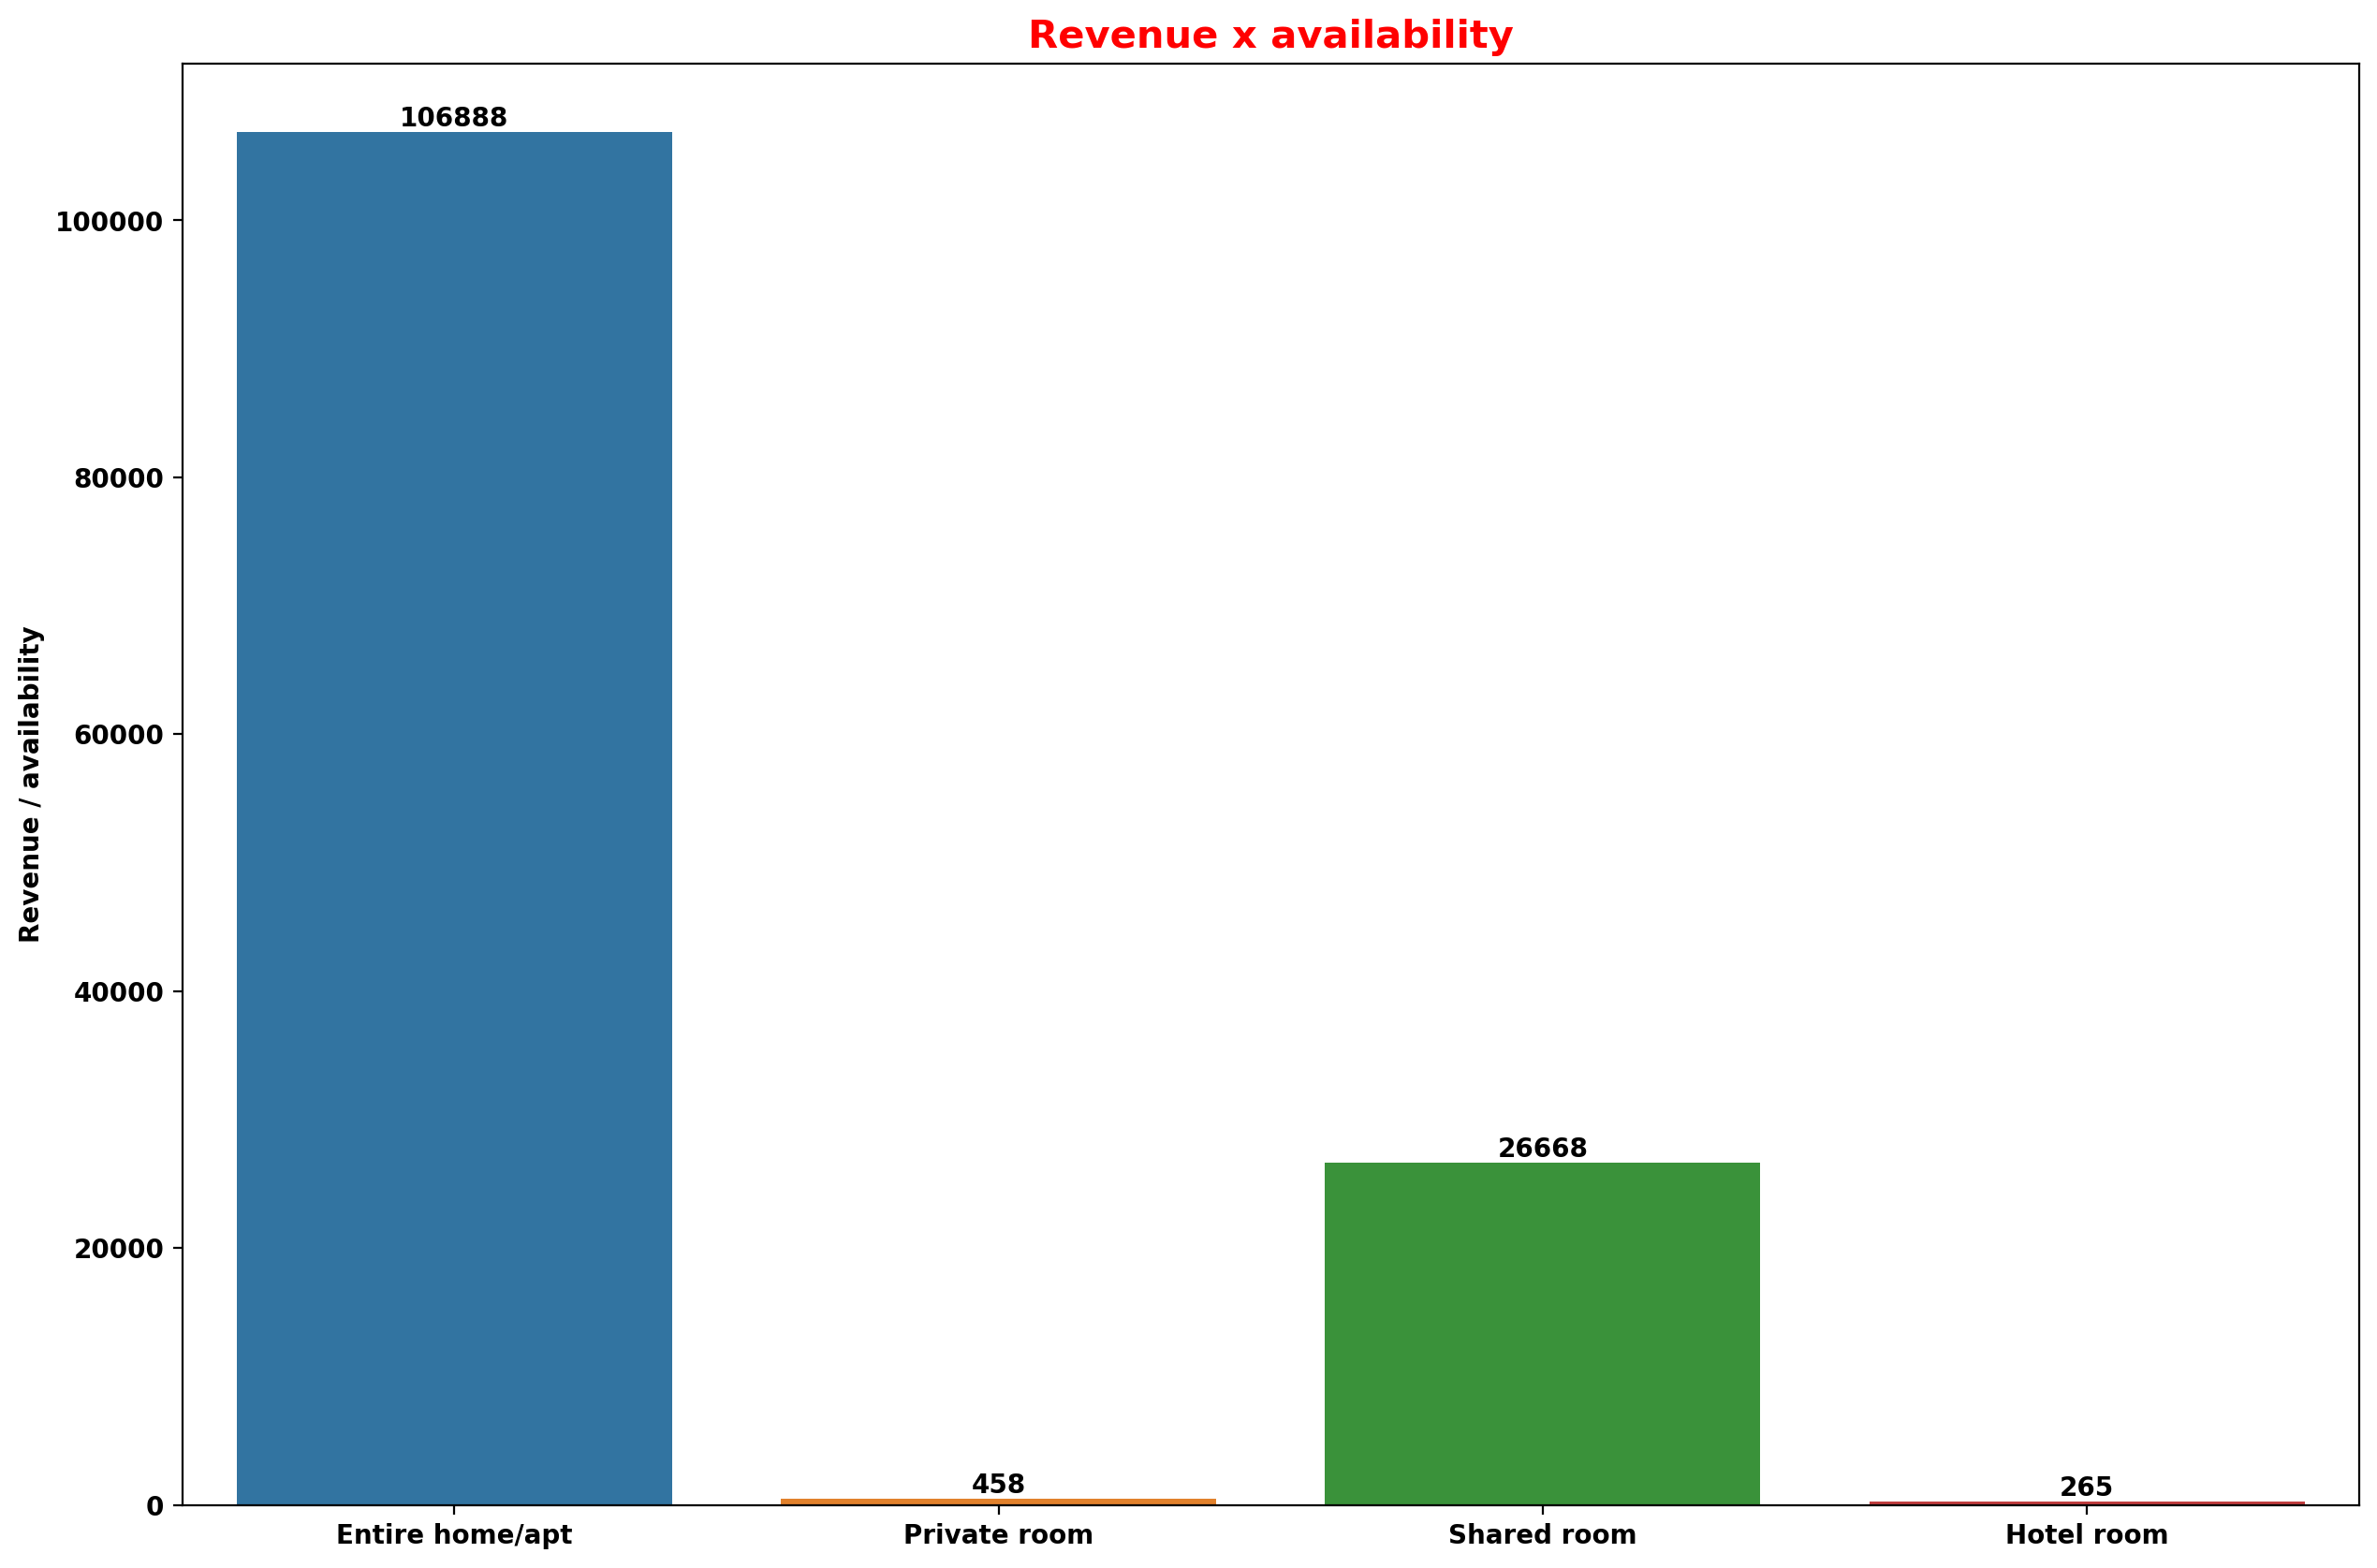

In [27]:
plt.figure(figsize=(15,10),dpi=200),
ax = sns.barplot(x="room_type", y="prof_avai", data=room_type_group_count)
plt.title("Revenue x availability", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Revenue / availability",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',weight="bold",
                    color= 'black')

plt.show()

Entire home/apt and shared room have high number of revenue x availability

In [28]:
borough_group_count["availability"]=occupancy_borough.availability_365.values
borough_group_count["income"]=borough_group_price.price.values
borough_group_count["prof_avai"]=round(borough_group_count["income"] / borough_group_count["availability"],2)

borough_group_count.head()

neighbourhood  count  percentage  availability      income  \
0             Westminster   9992       11.36    208.476768  320.591373   
1           Tower Hamlets   7080        8.05    203.200508  307.432795   
2                 Hackney   6182        7.03    190.877173  245.840426   
3  Kensington and Chelsea   5818        6.62    183.941463  243.722015   
4                  Camden   5757        6.55    173.608156  203.288171   

   prof_avai  
0       1.54  
1       1.51  
2       1.29  
3       1.32  
4       1.17

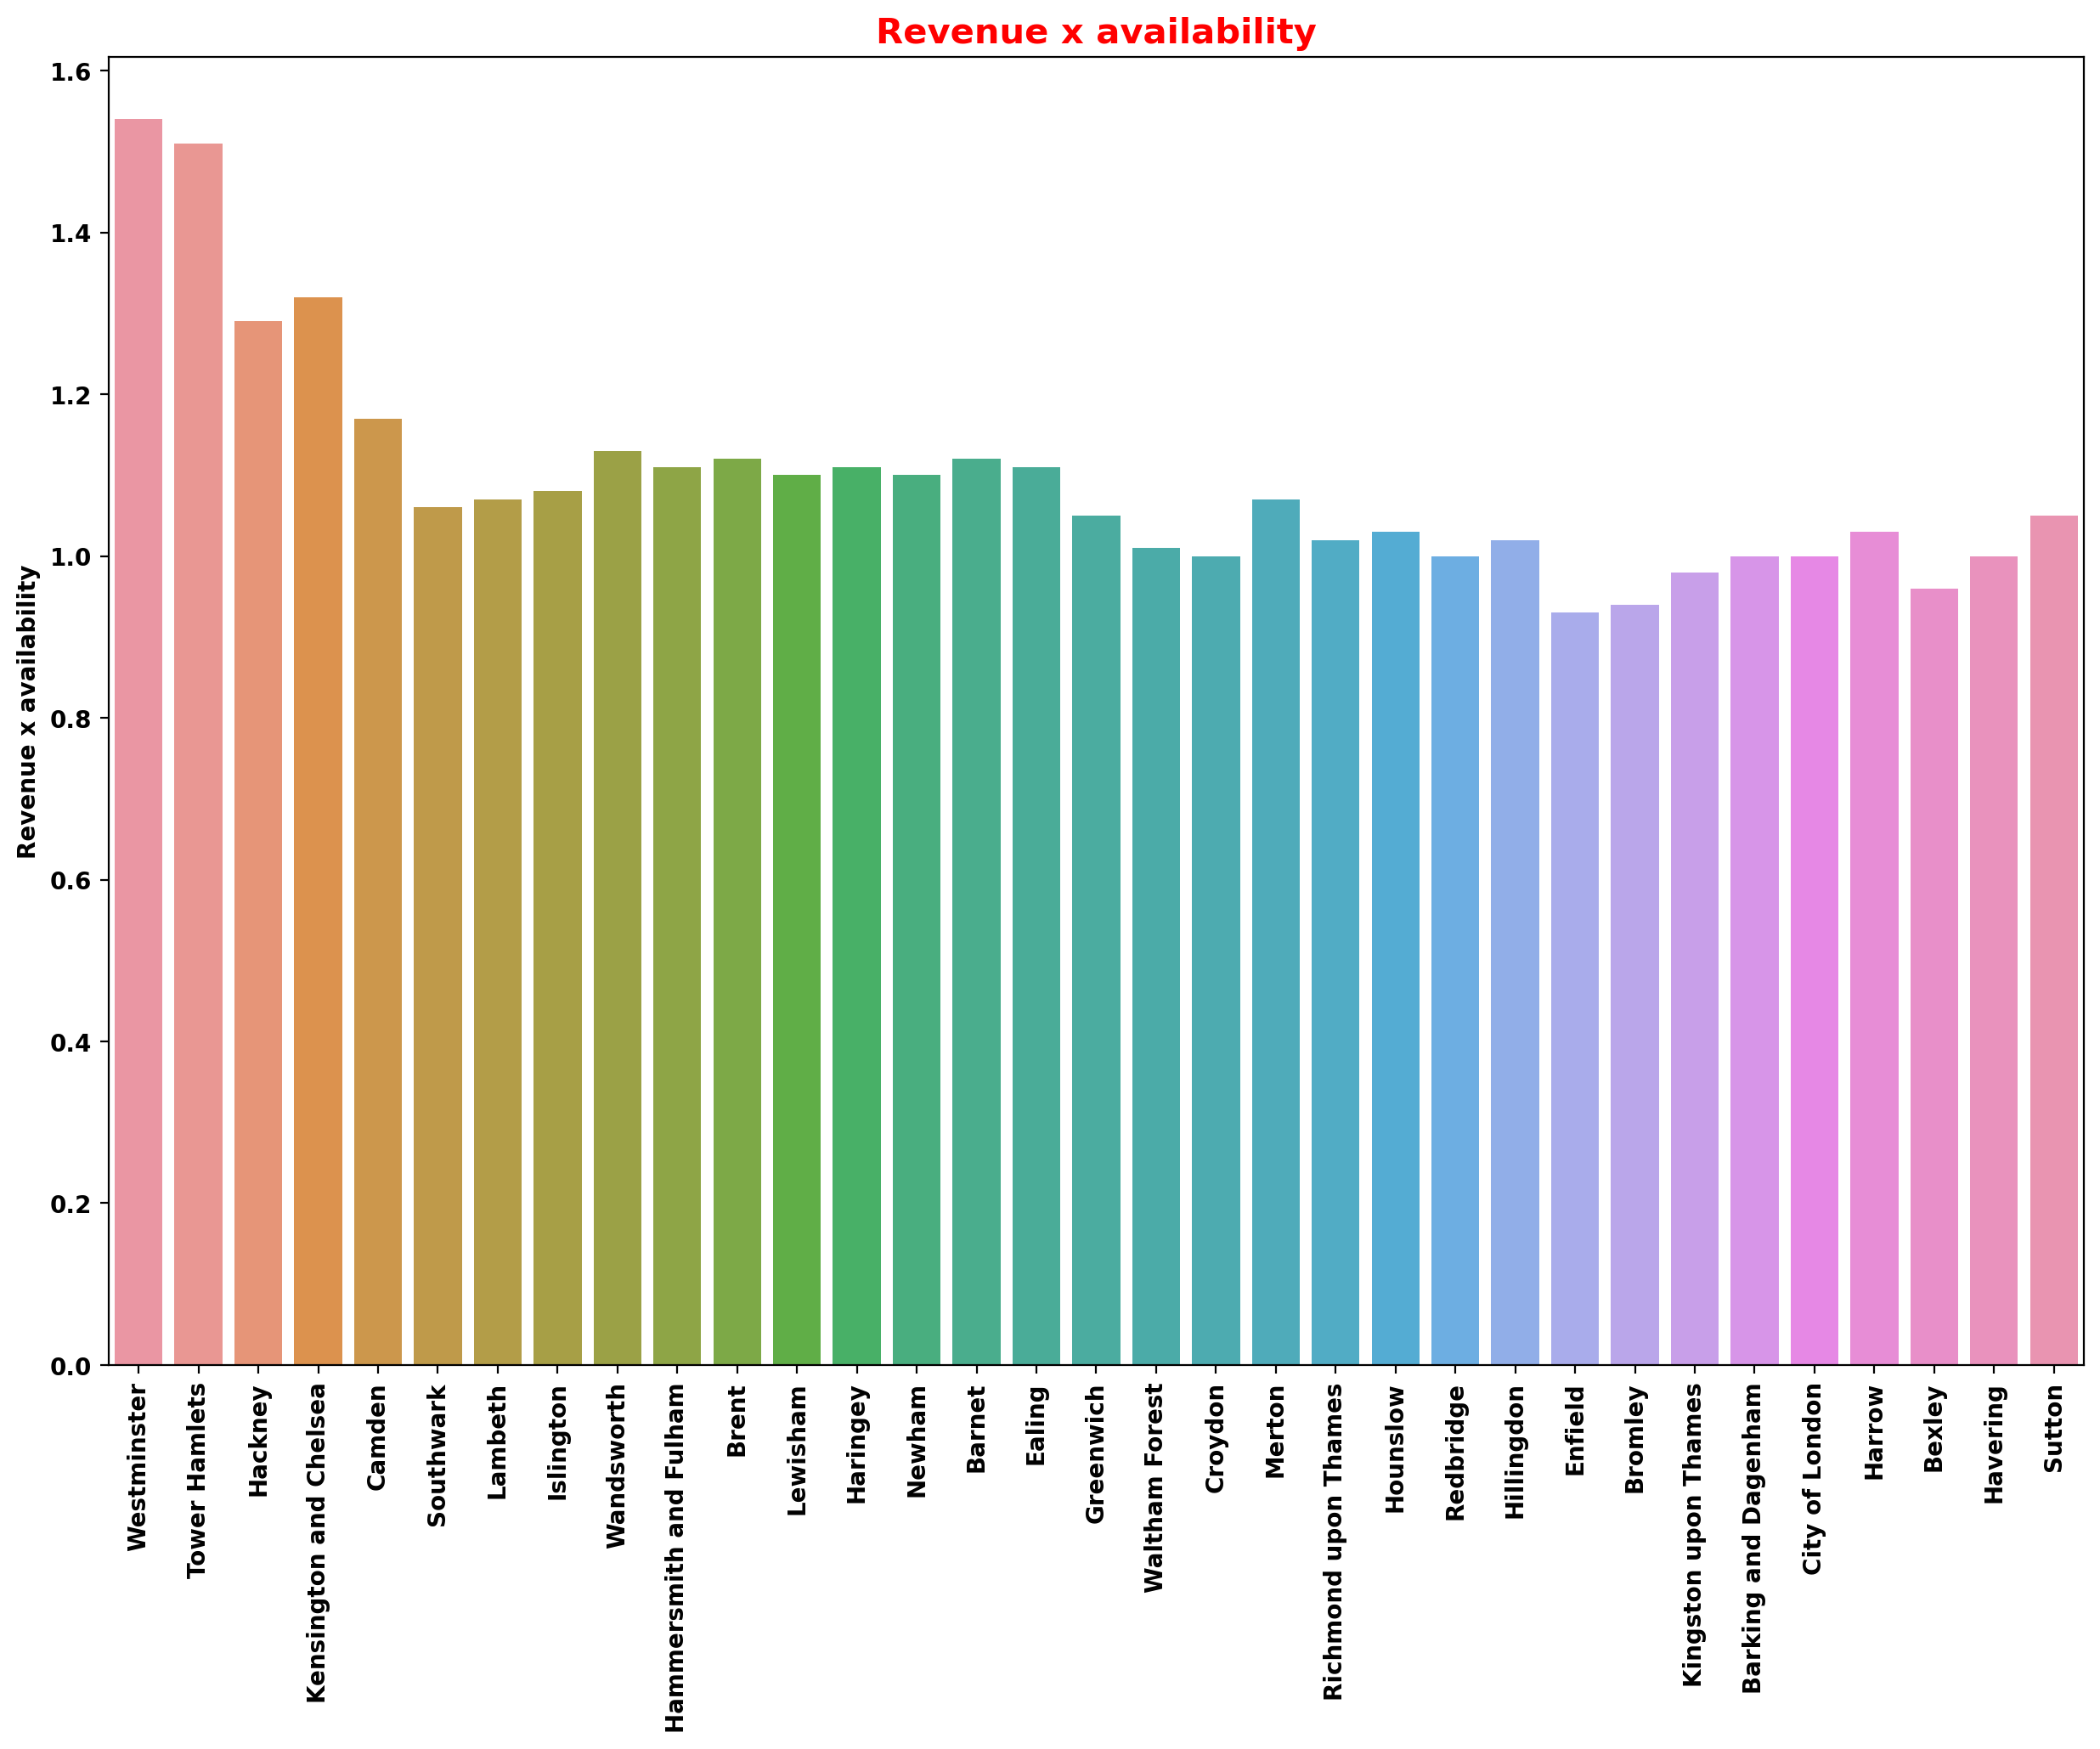

In [29]:
plt.figure(figsize=(15,10),dpi=200),
ax = sns.barplot(x="neighbourhood", y="prof_avai", data=borough_group_count)
plt.title("Revenue x availability", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Revenue x availability",weight= "bold",c="k")
plt.yticks(weight="bold")

plt.show()

The inner London neighbourhoods have high number of revenue x availability

### 7 - Which neighborhood has the most reviews?

In [30]:
# Group by Borough for total number of reviews

borough_group_reviews = listing.groupby("neighbourhood").number_of_reviews.sum().sort_values(ascending=False)
borough_group_reviews = borough_group_reviews.reset_index()
borough_group_count['n_reviews'] = borough_group_reviews.number_of_reviews.values
borough_group_count["per_reviews"] = round(borough_group_count["n_reviews"] / borough_group_count["n_reviews"].sum()*100,2)
borough_group_count.head()

neighbourhood  count  percentage  availability      income  \
0             Westminster   9992       11.36    208.476768  320.591373   
1           Tower Hamlets   7080        8.05    203.200508  307.432795   
2                 Hackney   6182        7.03    190.877173  245.840426   
3  Kensington and Chelsea   5818        6.62    183.941463  243.722015   
4                  Camden   5757        6.55    173.608156  203.288171   

   prof_avai  n_reviews  per_reviews  
0       1.54     198838        12.58  
1       1.51     143284         9.06  
2       1.29     123600         7.82  
3       1.32     107638         6.81  
4       1.17     103714         6.56

In [31]:
# Number of properties based on Borough that over 100 reviews

over_100_reviews = listing.sort_values("number_of_reviews",ascending=False)
over_100_reviews = over_100_reviews[over_100_reviews["number_of_reviews"]>=100]
over_100_reviews = over_100_reviews.groupby("neighbourhood").count().sort_values("number_of_reviews",ascending=False).head(10)
over_100_reviews

id  name  host_id  host_name  neighbourhood_group  \
neighbourhood                                                                
Westminster             411   411      411        411                    0   
Camden                  357   357      357        357                    0   
Tower Hamlets           262   262      262        262                    0   
Southwark               239   239      239        239                    0   
Lambeth                 221   221      221        221                    0   
Kensington and Chelsea  217   217      217        217                    0   
Islington               215   215      215        215                    0   
Hackney                 176   176      176        176                    0   
Wandsworth              155   155      155        155                    0   
Hammersmith and Fulham  147   147      147        147                    0   

                        latitude  longitude  room_type  price  minimum_nights  \
neighbourhood                                                                   
Westminster                  411        411        411    411             411   
Camden                       357        357        357    357             357   
Tower Hamlets                262        262        262    262             262   
Southwark                    239        239        239    239             239   
Lambeth                      221        221        221    221             221   
Kensington and Chelsea       217        217        217    217             217   
Islington                    215        215        215    215             215   
Hackney                      176        176        176    176             176   
Wandsworth                   155        155        155    155             155   
Hammersmith and Fulham       147        147        147    147             147   

                        number_of_reviews  last_review  reviews_per_month  \
neighbourhood                                                               
Westminster                           411          411                411   
Camden                                357          357                357   
Tower Hamlets                         262          262                262   
Southwark                             239          239                239   
Lambeth                               221          221                221   
Kensington and Chelsea                217          217                217   
Islington                             215          215                215   
Hackney                               176          176                176   
Wandsworth                            155          155                155   
Hammersmith and Fulham                147          147                147   

                        calculated_host_listings_count  availability_365  \
neighbourhood                                                              
Westminster                                        411               411   
Camden                                             357               357   
Tower Hamlets                                      262               262   
Southwark                                          239               239   
Lambeth                                            221               221   
Kensington and Chelsea                             217               217   
Islington                                          215               215   
Hackney                                            176               176   
Wandsworth                                         155               155   
Hammersmith and Fulham                             147               147   

                        number_of_reviews_ltm  license  
neighbourhood                                           
Westminster                               411        0  
Camden                                    357        0  
Tower Hamlets                             262    

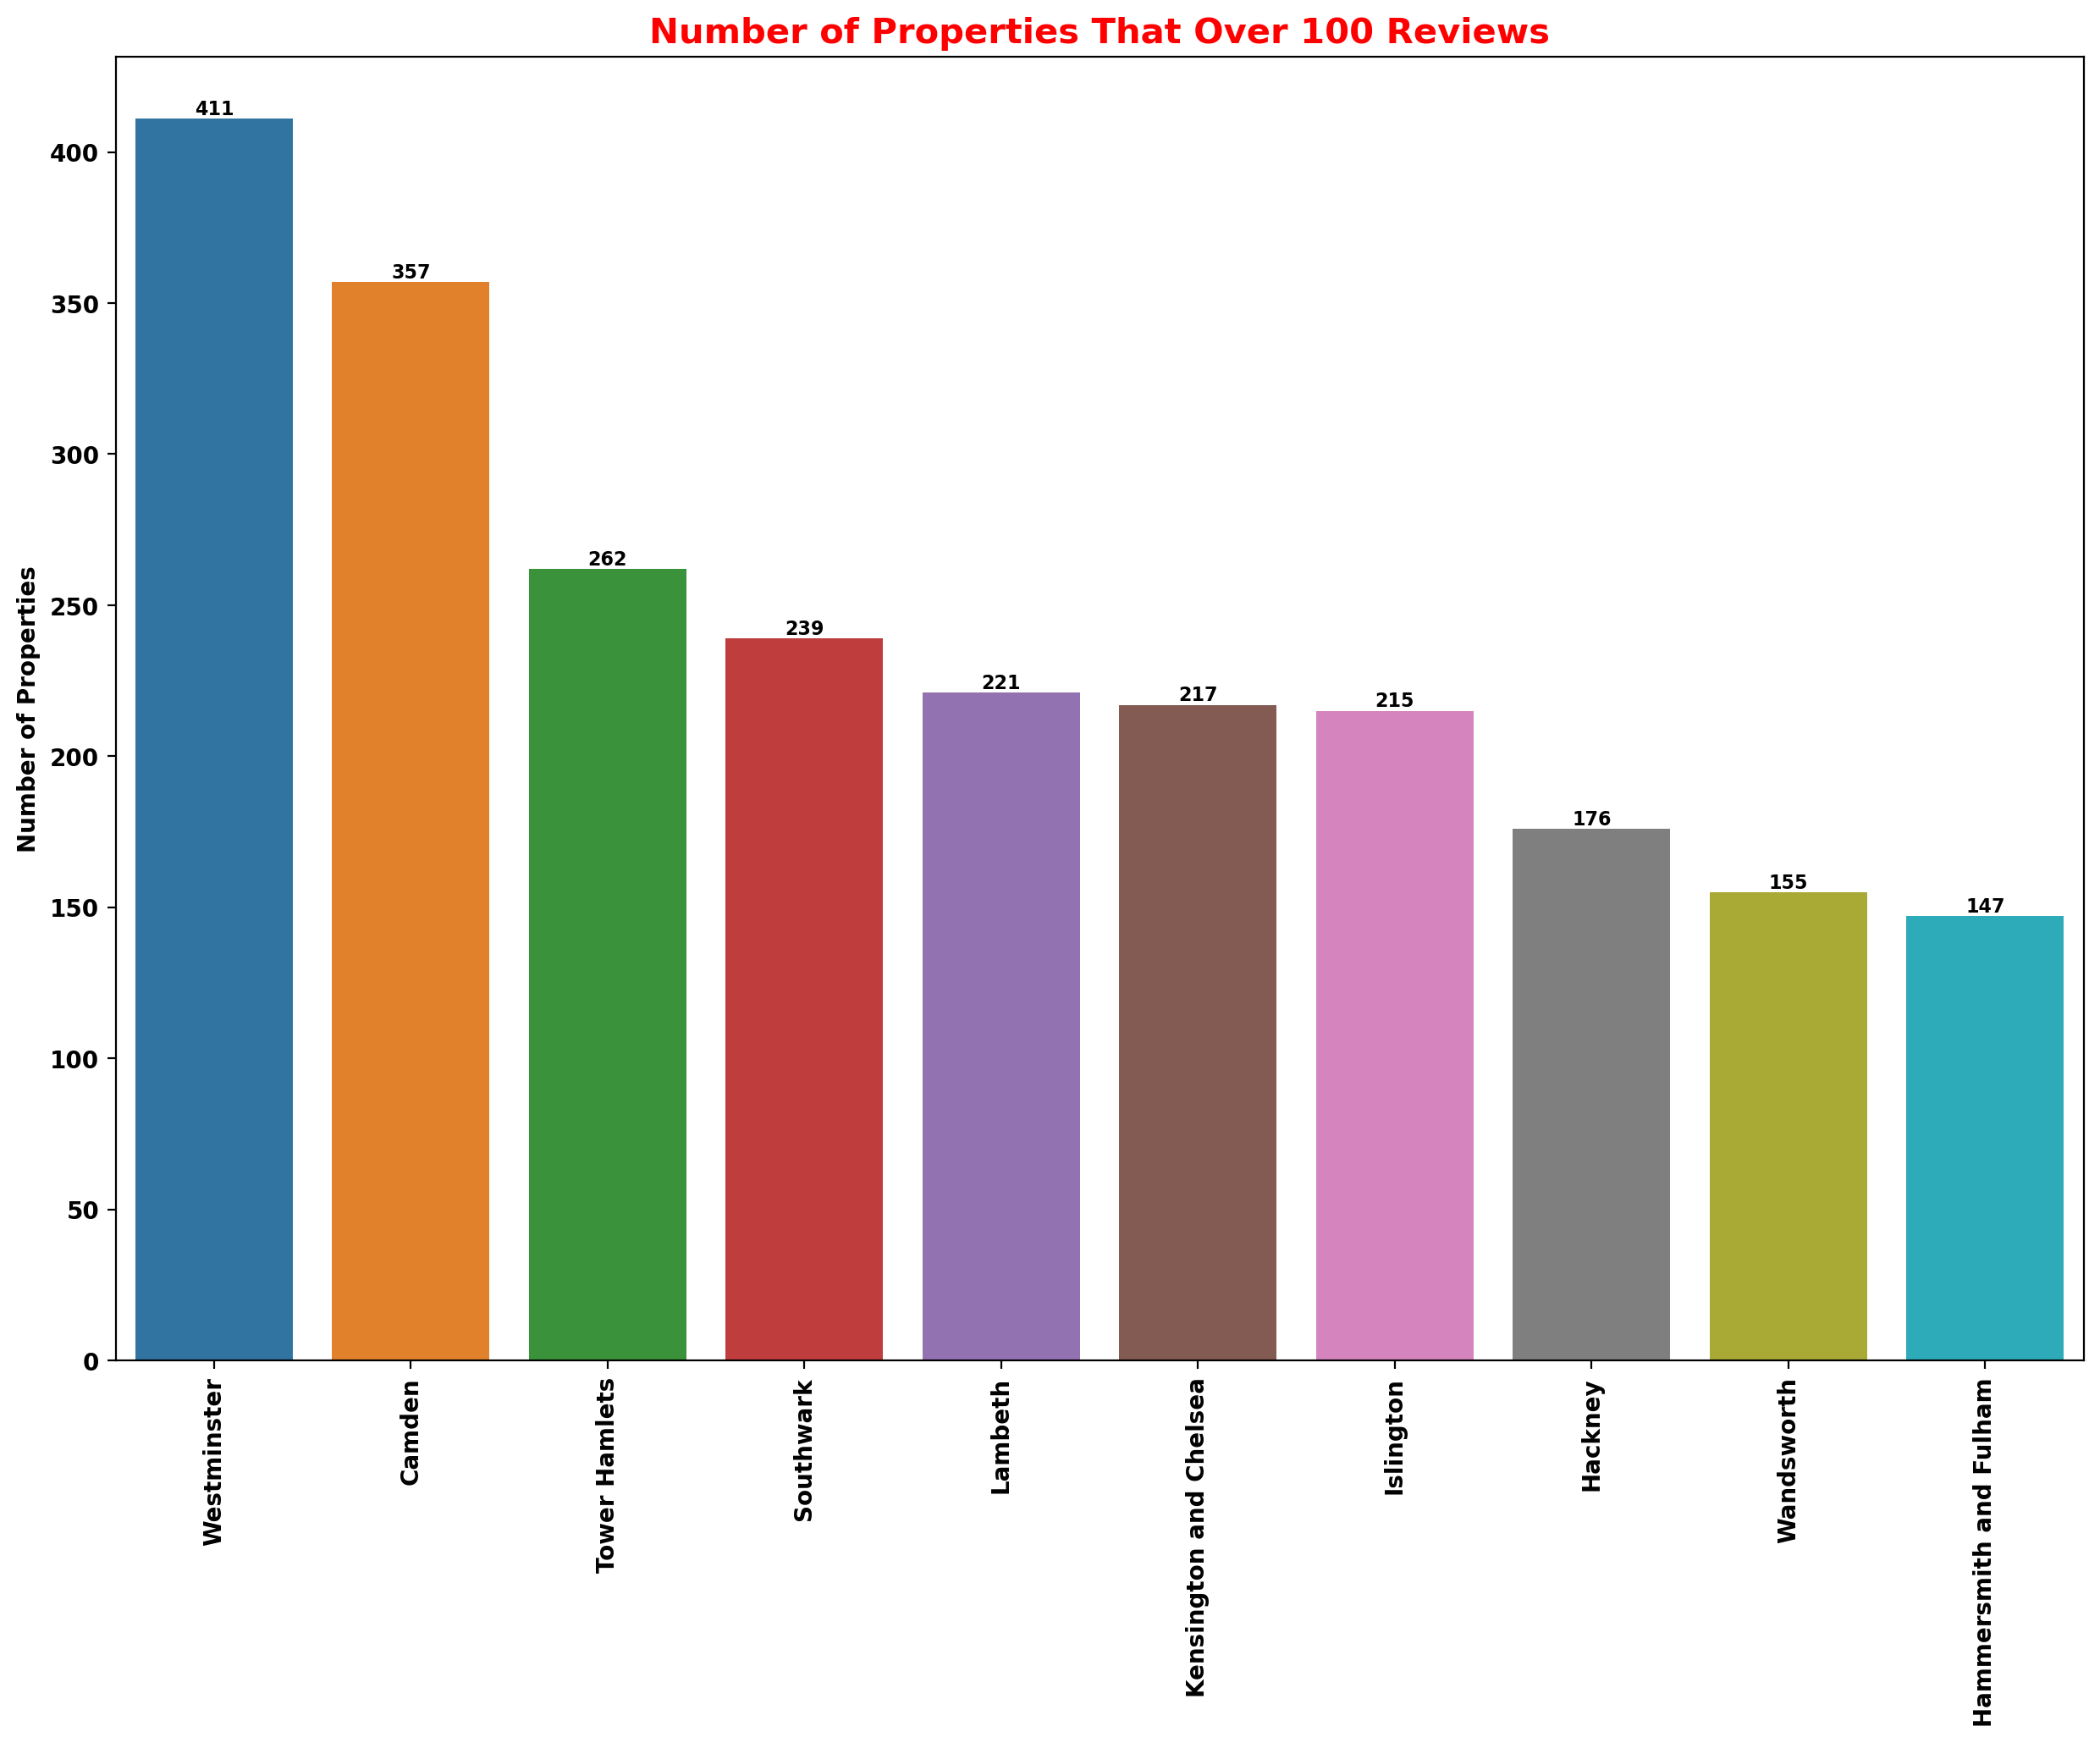

In [32]:
# Barplot of properties based on Borough that over 100 reviews

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x=over_100_reviews.index, y="number_of_reviews", data=over_100_reviews)
plt.title("Number of Properties That Over 100 Reviews", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of Properties",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=8, weight="bold")

plt.show()

The inner London neighbourhoods have high number of reviews again

### 8 - How is the distribuition of type of room per neighborhood?

In [33]:
listing.groupby(["neighbourhood","room_type"]).count().reset_index().pivot("room_type","neighbourhood","id")

C:\Users\arsnf\AppData\Local\Temp\ipykernel_17480\833227837.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  listing.groupby(["neighbourhood","room_type"]).count().reset_index().pivot("room_type","neighbourhood","id")


neighbourhood    Barking and Dagenham  Barnet  Bexley   Brent  Bromley  \
room_type                                                                
Entire home/apt                 265.0  1264.0   209.0  1512.0    404.0   
Hotel room                        NaN     4.0     NaN     NaN      NaN   
Private room                    294.0   961.0   282.0  1214.0    362.0   
Shared room                       5.0    20.0     4.0    14.0      6.0   

neighbourhood    Camden  City of London  Croydon  Ealing  Enfield  ...  \
room_type                                                          ...   
Entire home/apt  3901.0           471.0    737.0  1184.0    373.0  ...   
Hotel room         16.0             NaN      2.0     NaN     15.0  ...   
Private room     1809.0            63.0    758.0   974.0    428.0  ...   
Shared room        31.0             2.0      9.0    11.0      4.0  ...   

neighbourhood    Merton  Newham  Redbridge  Richmond upon Thames  Southwark  \
room_type                                                                     
Entire home/apt   786.0  1100.0      366.0                 815.0     2862.0   
Hotel room          NaN     4.0        NaN                   1.0        4.0   
Private room      656.0  1177.0      492.0                 436.0     2124.0   
Shared room        11.0    30.0       11.0                   5.0       25.0   

neighbourhood    Sutton  Tower Hamlets  Waltham Forest  Wandsworth  \
room_type                                                            
Entire home/apt   186.0         3936.0           951.0      2796.0   
Hotel room          NaN           15.0             NaN         4.0   
Private room      190.0         3093.0           754.0      1605.0   
Shared room         5.0           36.0            10.0        14.0   

neighbourhood    Westminster  
room_type                     
Entire home/apt       7729.0  
Hotel room              44.0  
Private room          2167.0  
Shared room             52.0  

[4 rows x 33 columns]

In [34]:
# Property Type and Borough

property_type_borough = listing.groupby(["neighbourhood","room_type"]).count().reset_index()
property_type_borough = property_type_borough.pivot("room_type","neighbourhood","id")
property_type_borough

C:\Users\arsnf\AppData\Local\Temp\ipykernel_17480\1635799639.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  property_type_borough = property_type_borough.pivot("room_type","neighbourhood","id")


neighbourhood    Barking and Dagenham  Barnet  Bexley   Brent  Bromley  \
room_type                                                                
Entire home/apt                 265.0  1264.0   209.0  1512.0    404.0   
Hotel room                        NaN     4.0     NaN     NaN      NaN   
Private room                    294.0   961.0   282.0  1214.0    362.0   
Shared room                       5.0    20.0     4.0    14.0      6.0   

neighbourhood    Camden  City of London  Croydon  Ealing  Enfield  ...  \
room_type                                                          ...   
Entire home/apt  3901.0           471.0    737.0  1184.0    373.0  ...   
Hotel room         16.0             NaN      2.0     NaN     15.0  ...   
Private room     1809.0            63.0    758.0   974.0    428.0  ...   
Shared room        31.0             2.0      9.0    11.0      4.0  ...   

neighbourhood    Merton  Newham  Redbridge  Richmond upon Thames  Southwark  \
room_type                                                                     
Entire home/apt   786.0  1100.0      366.0                 815.0     2862.0   
Hotel room          NaN     4.0        NaN                   1.0        4.0   
Private room      656.0  1177.0      492.0                 436.0     2124.0   
Shared room        11.0    30.0       11.0                   5.0       25.0   

neighbourhood    Sutton  Tower Hamlets  Waltham Forest  Wandsworth  \
room_type                                                            
Entire home/apt   186.0         3936.0           951.0      2796.0   
Hotel room          NaN           15.0             NaN         4.0   
Private room      190.0         3093.0           754.0      1605.0   
Shared room         5.0           36.0            10.0        14.0   

neighbourhood    Westminster  
room_type                     
Entire home/apt       7729.0  
Hotel room              44.0  
Private room          2167.0  
Shared room             52.0  

[4 rows x 33 columns]

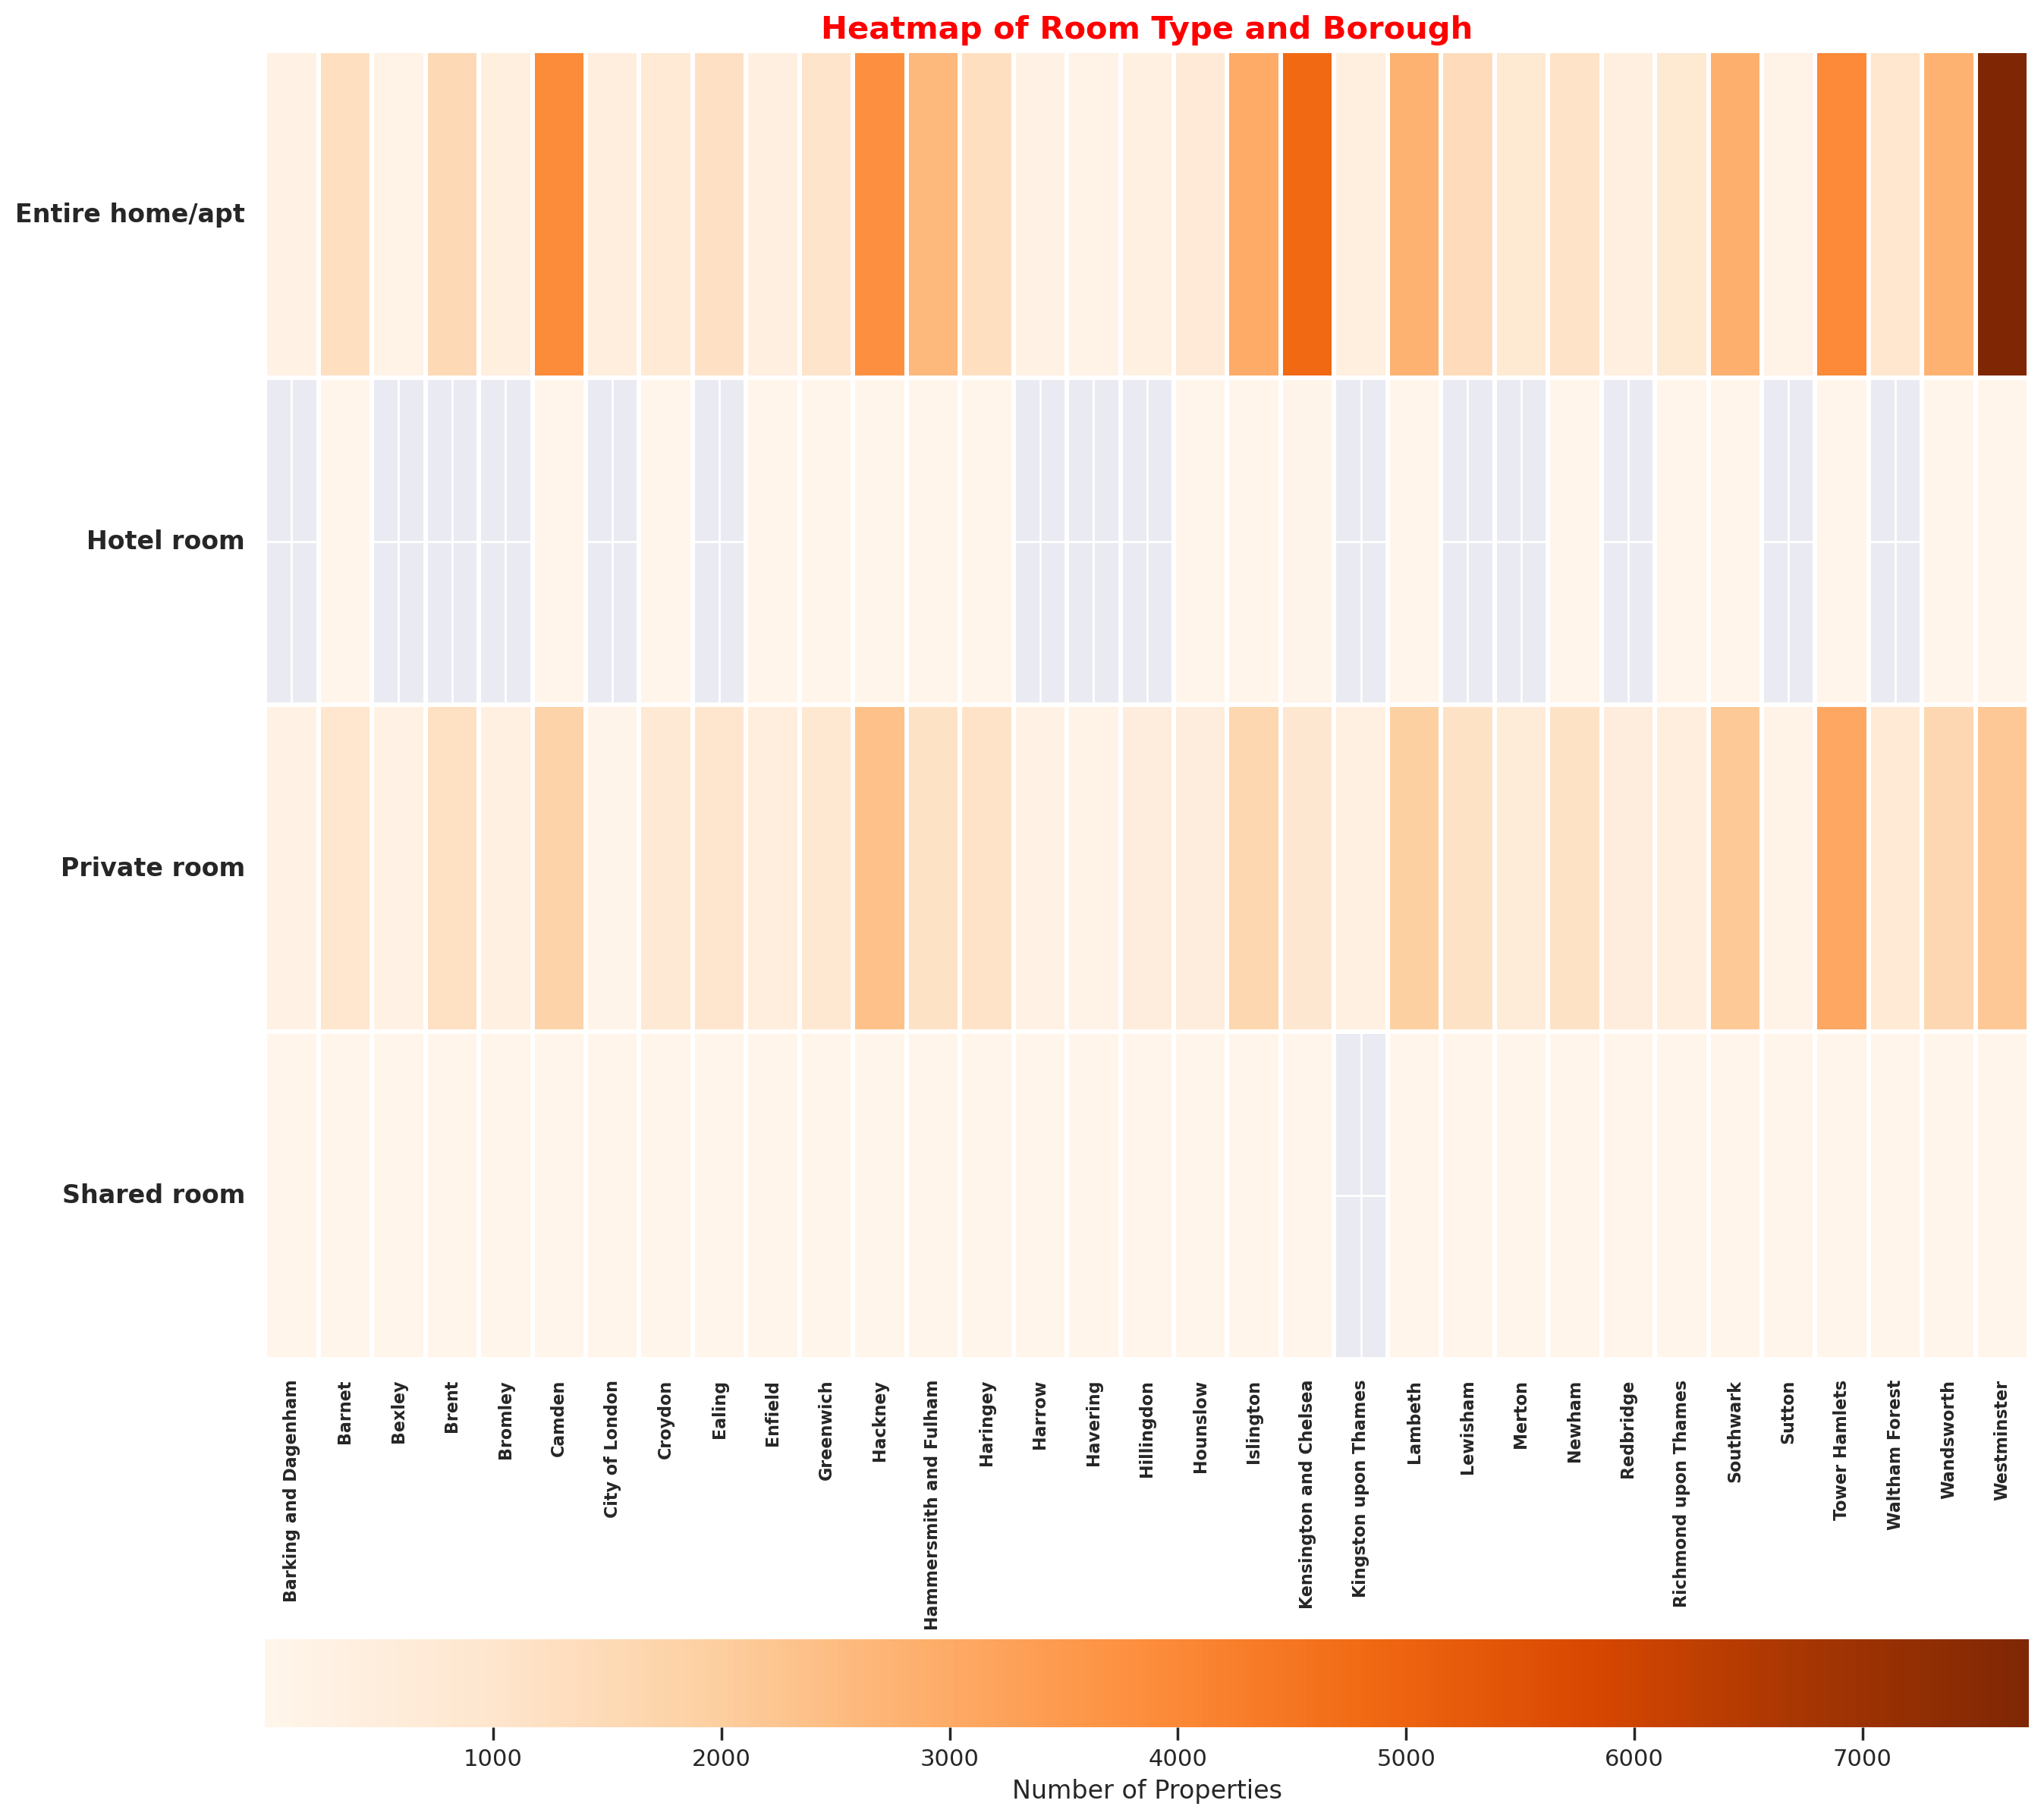

In [35]:
#Heatmap of Property Type and Borough

plt.figure(figsize=(15,16),dpi=200),
sns.set(font_scale=1)
sns.heatmap(property_type_borough,annot=False,fmt="d", linewidths=2, cmap="Oranges",cbar_kws={'label': 'Number of Properties','orientation':'horizontal'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=12)
plt.xticks(weight="bold",rotation=90,size=8)
plt.title("Heatmap of Room Type and Borough",weight="bold",c="red", fontsize=15)
plt.show()

### 9 - How is the distribuition of host per neighborhood?

In [36]:
#Distribution by host 
listing_host_borough = listing[listing["host_id"]==33889201]
listing_host_borough.groupby(["neighbourhood"]).id.count().reset_index().sort_values("id",ascending=False).head()

neighbourhood  id
10  Kensington and Chelsea  54
17              Wandsworth  51
6   Hammersmith and Fulham  43
9                Islington  38
2                   Camden  25

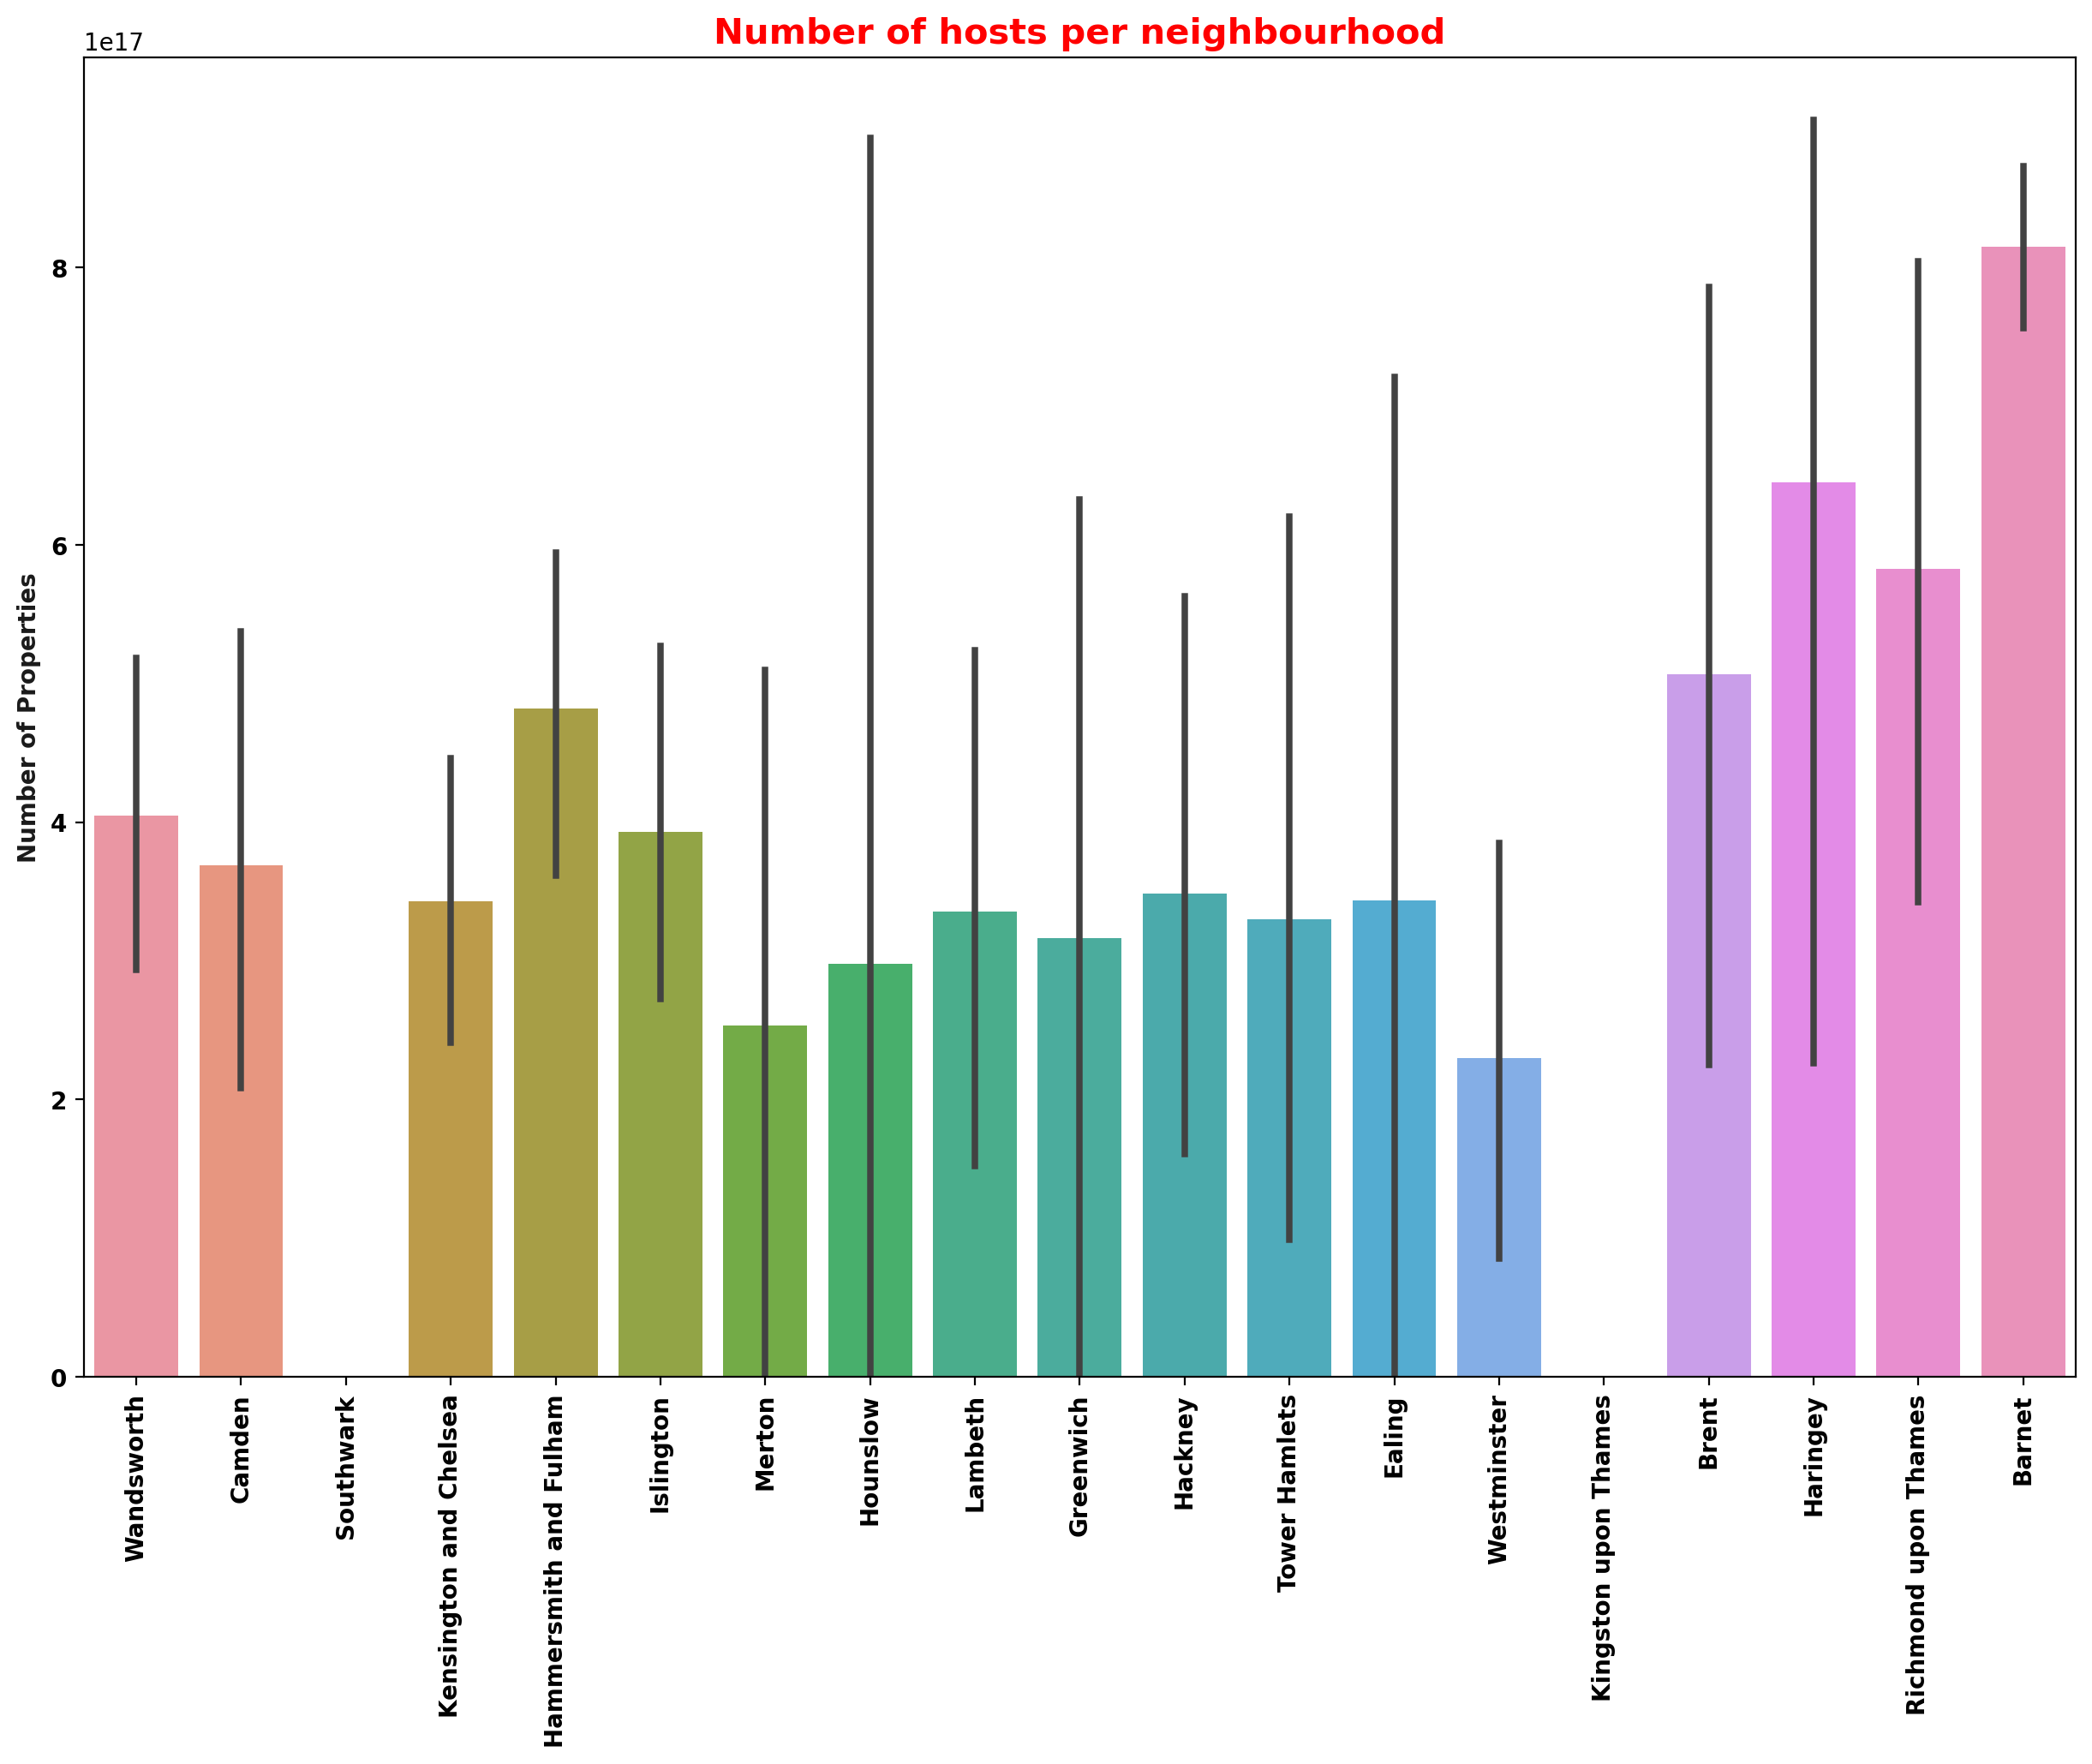

In [37]:
# Barplot of Distribution by host 

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x='neighbourhood', y="id", data=listing_host_borough)
plt.title("Number of hosts per neighbourhood", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of Properties",weight= "bold",c="k")
plt.yticks(weight="bold")

plt.show()

### 10 - How prices vary with reviews?

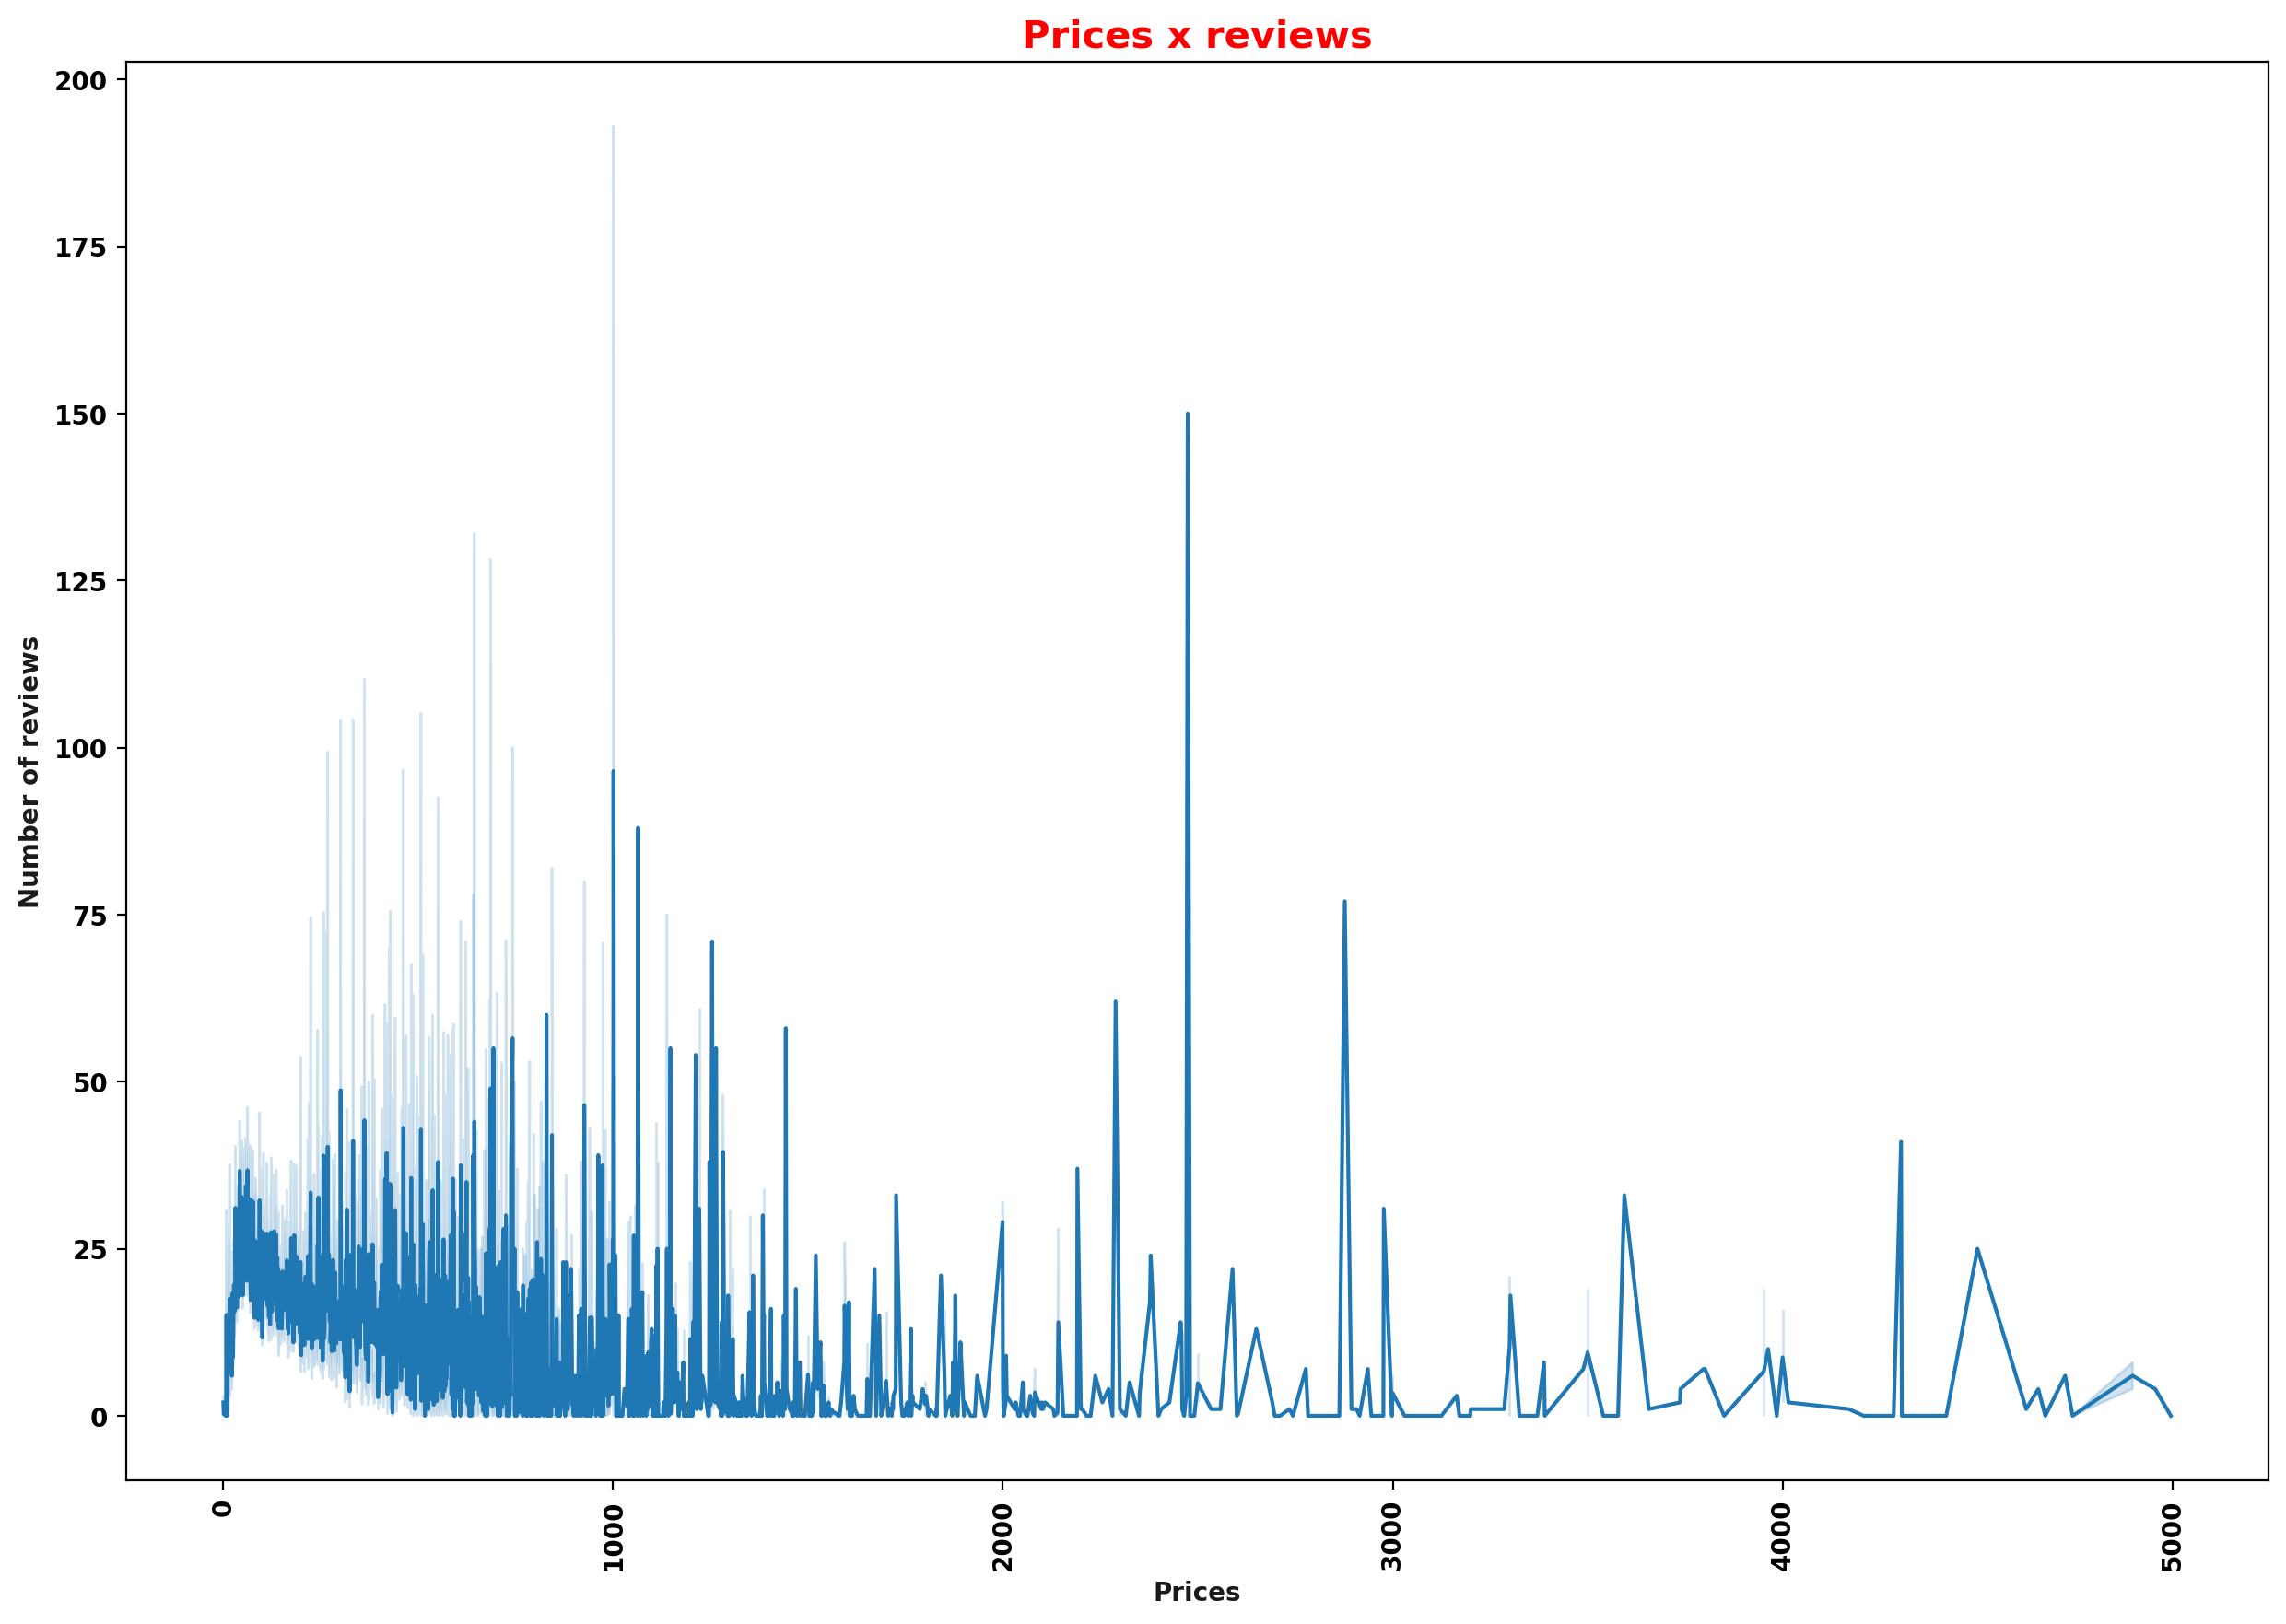

In [38]:
plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.lineplot(x="price", y="number_of_reviews", data=listing[listing['price']<5000])
plt.title("Prices x reviews", weight="bold", c="red", fontsize=15)
plt.xlabel("Prices",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of reviews",weight= "bold",c="k")
plt.yticks(weight="bold")

plt.show()

The prices seem not to vary with number of reviews

### 11 - How is the distribuition of prices per London?

<Figure size 3000x2000 with 0 Axes>

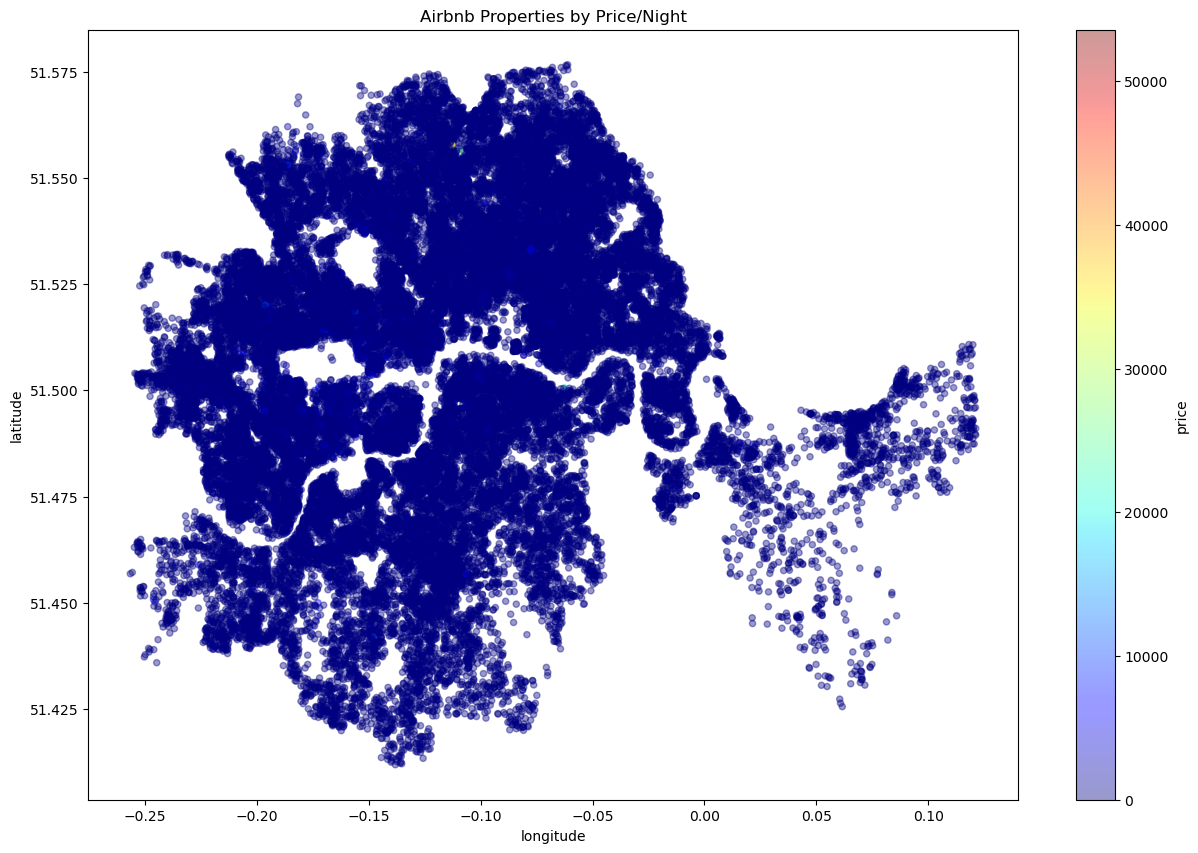

In [39]:
#Map for list Average Price

inner_london = ['Kensington and Chelsea', 'Westminster','Hammersmith and Fulham', 'Wandsworth','Hackney', 
                'Southwark','Tower Hamlets', 'Camden','Lambeth', 'Greenwich', 'City of London','Islington']

inner_london_filter=listing[listing["neighbourhood"].isin(inner_london)]
outer_london_filter=listing[~listing["neighbourhood"].isin(inner_london)]

plt.figure(figsize=(15,10),dpi=200),

inner_london_filter.plot(kind='scatter', x='longitude', y='latitude', c='price', 
                                      cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Airbnb Properties by Price/Night")

plt.show()

There are a few high prices that not help this graphic

<Figure size 3000x2000 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

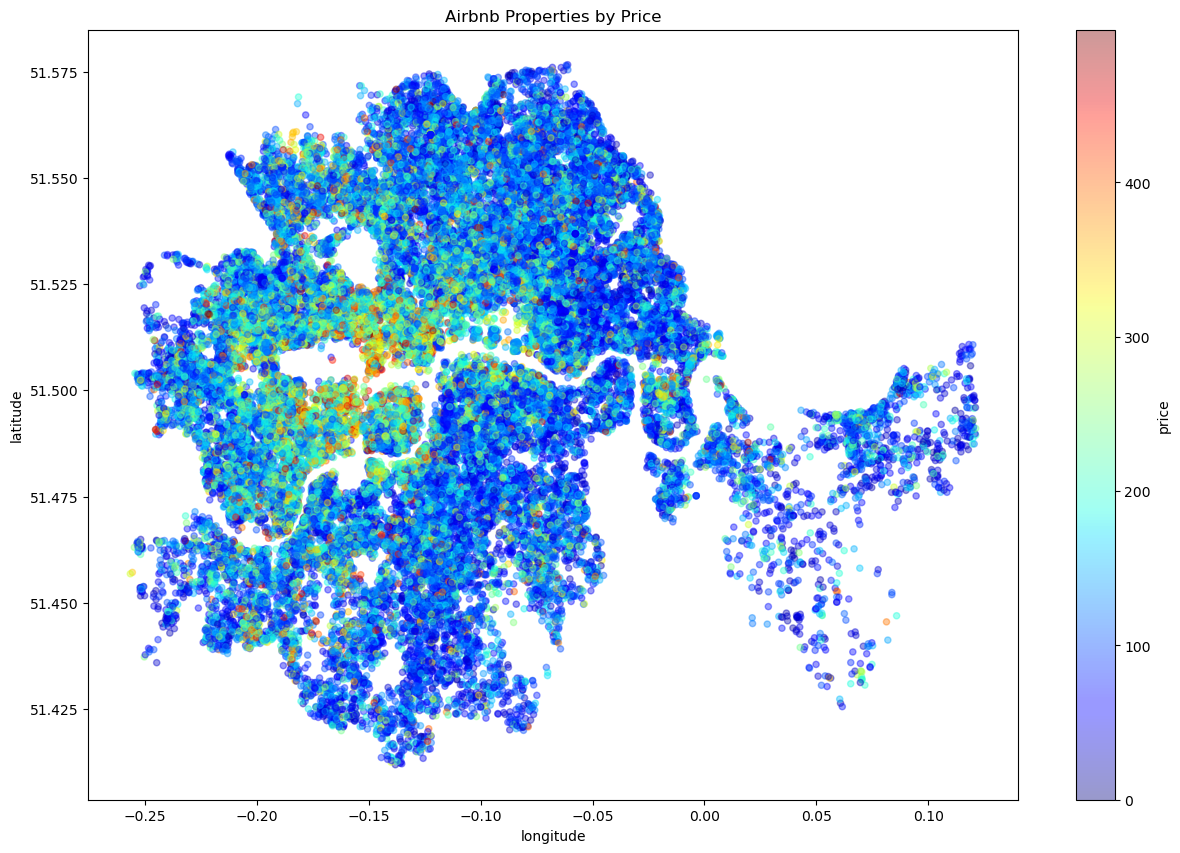

In [40]:
#Map for list Average Price < 500

plt.figure(figsize=(15,10),dpi=200),

#Map for list Average Price

plt.figure(figsize=(15,10),dpi=200),

less_500 = inner_london_filter[inner_london_filter['price']<500]

less_500.plot(kind='scatter', x='longitude', y='latitude', c='price', 
                                      cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))

plt.title("Airbnb Properties by Price")

plt.show()

Inner london has the higher prices.

##### 